# O quão bom é Max Verstappen? Uma análise de dados

Neste notebook, apresento uma análise de dados construída a partir da fonte de dados da F1 Jolpica, previamente extraído e refinado dentro da própria codebase em que este notebook está hospedado.

O objetivo é responder, de forma analítica, à pergunta: **“O quão bom é Max Verstappen?”**
Para isso, sigo uma narrativa dedutiva, partindo de indicadores mais gerais — como número de vitórias, pódios e títulos — a fim de estabelecer um panorama inicial e nivelar o contexto para qualquer leitor: estamos, sem dúvida, diante de um dos maiores pilotos da Fórmula 1 moderna.

Em seguida, à medida que a análise se aprofunda, passo a examinar métricas mais específicas e comparativas — como consistência de desempenho, diferença em relação aos companheiros de equipe e outros fatores que ajudam a isolar variáveis externas, como o desempenho do carro ou da equipe.
O objetivo é ir além da “obviedade” dos números brutos, buscando entender até que ponto o domínio de Verstappen é reflexo do carro ou resultado do próprio piloto.

## Setup da análise:

Imports, configs etc...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as fxns
import os
from pathlib import Path
import utils as fxns
from dateutil.relativedelta import relativedelta

# Caminho absoluto da raiz do projeto
project_root = Path.cwd().parent  # se o notebook está em /notebooks
os.chdir(project_root)

print("Diretório atual:", Path.cwd())

Diretório atual: b:\projetos\f1_analytics


In [2]:
from src.modules.db_reader import DbReader
from src.data_viz.plotter import Plotter
f1_db = DbReader()
plotter = Plotter()

### Importando os datasets:

In [3]:
# Corridas:

df_races = f1_db.run_query_file("data/db_queries/race_results_report.sql").drop_duplicates()
df_races['race_date'] = pd.to_datetime(df_races['race_date'])
df_races['race_count_for_driver'] = df_races.groupby(['driver_id'])['race_name'].transform('count')


df_races

,race_name,round_id,year,race_date,circuit_name,circuit_country,driver_id,driver_code,driver_ref,driver_forename,...,finishing_position,points_scored,laps_completed,time_in_race_ms,fastest_lap_number,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,race_status,race_count_for_driver
0,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,845,NOR,norris,Lando,...,1,25.0,57.0,01:42:06.304,43.0,1.0,00:01:22.167,NaN,0.0,146
1,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,831,VER,max_verstappen,Max,...,2,18.0,57.0,01:42:07.199,43.0,3.0,00:01:23.081,NaN,0.0,227
2,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,847,RUS,russell,George,...,3,15.0,57.0,01:42:14.785,43.0,11.0,00:01:25.065,NaN,0.0,146
3,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,863,ANT,antonelli,Andrea Kimi,...,4,12.0,57.0,01:42:16.439,43.0,9.0,00:01:24.901,NaN,0.0,18
4,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,846,ALB,albon,Alexander,...,5,10.0,57.0,01:42:19.077,43.0,8.0,00:01:24.597,NaN,0.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,80,None,sanesi,Consalvo,...,23,0.0,11.0,None,NaN,NaN,None,NaN,11.0,5
25749,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,28,None,manzon,Robert,...,24,0.0,7.0,None,NaN,NaN,None,NaN,11.0,29
25750,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,15,None,bira,Prince,...,25,0.0,1.0,None,NaN,NaN,None,NaN,11.0,19
25751,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,81,None,pietsch,Paul,...,26,0.0,0.0,None,NaN,NaN,None,NaN,11.0,3


In [4]:
# Infos sobre pilotos:

df_drivers = f1_db.run_query_file("data/db_queries/drivers.sql").drop_duplicates()
df_drivers['dob'] = pd.to_datetime(df_drivers['dob'])
df_drivers


,driver_id,driver_code,driver_forename,driver_surname,driver_full_name,dob
0,1,None,Nino,Farina,Nino Farina,1906-10-30
1,2,None,Luigi,Fagioli,Luigi Fagioli,1898-06-09
2,3,None,Reg,Parnell,Reg Parnell,1911-07-02
3,4,None,Yves,Cabantous,Yves Cabantous,1904-10-08
4,5,None,Louis,Rosier,Louis Rosier,1905-11-05
...,...,...,...,...,...,...
859,860,COL,Franco,Colapinto,Franco Colapinto,2003-05-27
860,861,DOO,Jack,Doohan,Jack Doohan,2003-01-20
861,862,BOR,Gabriel,Bortoleto,Gabriel Bortoleto,2004-10-14
862,863,ANT,Andrea Kimi,Antonelli,Andrea Kimi Antonelli,2006-08-25


In [5]:
df_lap_times = f1_db.run_query_file("data/db_queries/lap_times_report.sql").drop_duplicates()
df_lap_times['race_date'] = pd.to_datetime(df_lap_times['race_date'])
df_lap_times = fxns.add_lap_time_ms_column(df_lap_times)
df_lap_times

,race_name,year,race_date,circuit_name,circuit_country,driver_code,driver_forename,driver_surname,driver_full_name,driver_nationality,lap_number,position_on_lap,lap_time,race_status,is_pit_lap,lap_time_ms
0,Singapore Grand Prix,2025,2025-10-05,Marina Bay Street Circuit,Singapore,RUS,George,Russell,George Russell,British,1.0,1.0,00:01:43.905,0.0,0,103905.0
1,Singapore Grand Prix,2025,2025-10-05,Marina Bay Street Circuit,Singapore,VER,Max,Verstappen,Max Verstappen,Dutch,1.0,2.0,00:01:44.887,0.0,0,104887.0
2,Singapore Grand Prix,2025,2025-10-05,Marina Bay Street Circuit,Singapore,NOR,Lando,Norris,Lando Norris,British,1.0,3.0,00:01:45.566,0.0,0,105566.0
3,Singapore Grand Prix,2025,2025-10-05,Marina Bay Street Circuit,Singapore,PIA,Oscar,Piastri,Oscar Piastri,Australian,1.0,4.0,00:01:46.982,0.0,0,106982.0
4,Singapore Grand Prix,2025,2025-10-05,Marina Bay Street Circuit,Singapore,LEC,Charles,Leclerc,Charles Leclerc,Monegasque,1.0,5.0,00:01:47.564,0.0,0,107564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609537,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,None,Damon,Hill,Damon Hill,British,58.0,1.0,00:01:37.529,0.0,0,97529.0
609538,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,VIL,Jacques,Villeneuve,Jacques Villeneuve,Canadian,58.0,2.0,00:01:45.524,0.0,0,105524.0
609539,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,None,Eddie,Irvine,Eddie Irvine,British,58.0,3.0,00:01:39.312,0.0,0,99312.0
609540,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,None,Gerhard,Berger,Gerhard Berger,Austrian,58.0,4.0,00:01:38.055,0.0,0,98055.0


In [6]:
# Vou adicionar a idade no dataset de corridas, já que vou acabar usando isso agora e em outros momentos:

df_races = pd.merge(
    df_races,
    df_drivers[['driver_id', 'dob']],
    on='driver_id',
    how='left'
)

df_races['driver_age_at_race'] = df_races.apply(lambda row: fxns.calcula_idade(row['dob'], row['race_date']), axis=1)
df_races

,race_name,round_id,year,race_date,circuit_name,circuit_country,driver_id,driver_code,driver_ref,driver_forename,...,laps_completed,time_in_race_ms,fastest_lap_number,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,race_status,race_count_for_driver,dob,driver_age_at_race
0,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,845,NOR,norris,Lando,...,57.0,01:42:06.304,43.0,1.0,00:01:22.167,NaN,0.0,146,1999-11-13,25.338809
1,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,831,VER,max_verstappen,Max,...,57.0,01:42:07.199,43.0,3.0,00:01:23.081,NaN,0.0,227,1997-09-30,27.457906
2,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,847,RUS,russell,George,...,57.0,01:42:14.785,43.0,11.0,00:01:25.065,NaN,0.0,146,1998-02-15,27.080082
3,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,863,ANT,antonelli,Andrea Kimi,...,57.0,01:42:16.439,43.0,9.0,00:01:24.901,NaN,0.0,18,2006-08-25,18.557153
4,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,846,ALB,albon,Alexander,...,57.0,01:42:19.077,43.0,8.0,00:01:24.597,NaN,0.0,123,1996-03-23,28.980151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,80,None,sanesi,Consalvo,...,11.0,None,NaN,NaN,None,NaN,11.0,5,1911-03-28,39.436003
25749,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,28,None,manzon,Robert,...,7.0,None,NaN,NaN,None,NaN,11.0,29,1917-04-12,33.393566
25750,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,15,None,bira,Prince,...,1.0,None,NaN,NaN,None,NaN,11.0,19,1914-07-15,36.136893
25751,Italian Grand Prix,7,1950,1950-09-03,Autodromo Nazionale di Monza,Italy,81,None,pietsch,Paul,...,0.0,None,NaN,NaN,None,NaN,11.0,3,1911-06-20,39.206023


## Começando do começo...

Max Verstappen chegou fazendo barulho na F1, sendo o piloto mais jovem da história da F1 ao largar em uma corrida:

In [7]:
df_first_race = fxns.gerar_dataset_primeiro_evento(df_races, df_drivers)

In [8]:
df_top_10_jovens_largada = df_first_race[df_first_race['race_count_for_driver'] > 5] # Tem uns pilotos que fizeram só 1 GP há muito tempo, não quero levar em conta e não muda o Top 1
df_top_10_jovens_largada = df_top_10_jovens_largada.sort_values("idade_primeiro_evento").head(10)
df_top_10_jovens_largada

,driver_id,driver_full_name,race_name,race_date,year,circuit_name,circuit_country,race_status,finishing_position,starting_position,race_count_for_driver,dob,idade_primeiro_evento
538,831,Max Verstappen,Australian Grand Prix,2015-03-15,2015,Albert Park Grand Prix Circuit,Australia,11.0,13,11.0,227,1997-09-30,17.453799
478,840,Lance Stroll,Australian Grand Prix,2017-03-26,2017,Albert Park Grand Prix Circuit,Australia,11.0,16,20.0,185,1998-10-29,18.406571
36,863,Andrea Kimi Antonelli,Australian Grand Prix,2025-03-16,2025,Albert Park Grand Prix Circuit,Australia,0.0,4,16.0,18,2006-08-25,18.557153
589,859,Oliver Bearman,Saudi Arabian Grand Prix,2024-03-09,2024,Jeddah Corniche Circuit,Saudi Arabia,0.0,7,11.0,21,2005-05-08,18.836413
479,845,Lando Norris,Australian Grand Prix,2019-03-17,2019,Albert Park Grand Prix Circuit,Australia,1.0,12,8.0,146,1999-11-13,19.340178
364,804,Jaime Alguersuari,Hungarian Grand Prix,2009-07-26,2009,Hungaroring,Hungary,1.0,15,19.0,46,1990-03-23,19.342916
674,370,Ricardo Rodríguez,Italian Grand Prix,1961-09-10,1961,Autodromo Nazionale di Monza,Italy,11.0,17,2.0,6,1942-02-14,19.570157
234,763,Fernando Alonso,Australian Grand Prix,2001-03-04,2001,Albert Park Grand Prix Circuit,Australia,1.0,12,19.0,422,1981-07-29,19.597536
126,404,Chris Amon,Monaco Grand Prix,1963-05-26,1963,Circuit de Monaco,Monaco,30.0,16,0.0,102,1943-07-20,19.849418
225,752,Esteban Tuero,Australian Grand Prix,1998-03-08,1998,Albert Park Grand Prix Circuit,Australia,11.0,15,17.0,16,1978-04-22,19.876797


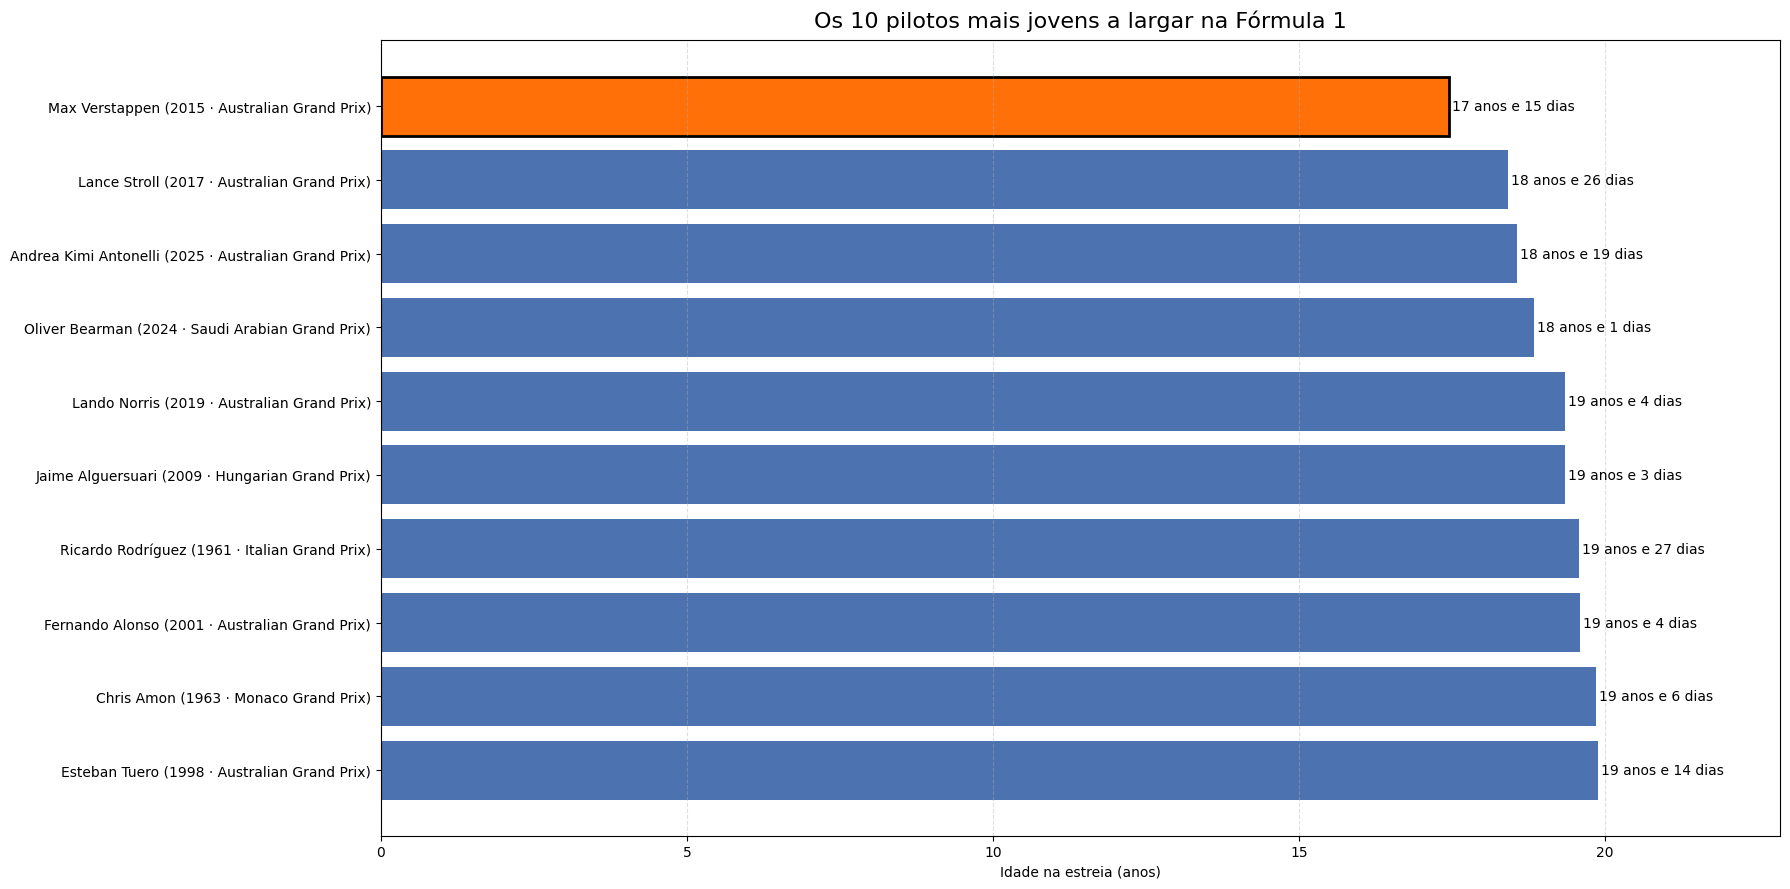

In [9]:
fxns.gera_graf_top_10_mais_jovens(df_top_10_jovens_largada, "Os 10 pilotos mais jovens a largar na Fórmula 1", "Idade na estreia (anos)", "Verstappen")

E vai além, ele não apenas possui essa marca considerando estréia, mas pra vitória na F1 também.

In [10]:
# Vamos gerar um dataset com a primeira vitória de cada piloto por idade no momento em que conquistou a sua vitória:

df_race_wins = df_races[df_races['finishing_position'] == 1].copy()

df_first_win = fxns.gerar_dataset_primeiro_evento(df_race_wins, df_drivers)

In [11]:
# Agora pego os 10 mais jovens:

df_top_10_jovens_vencedores = df_first_win.sort_values("idade_primeiro_evento").head(10)

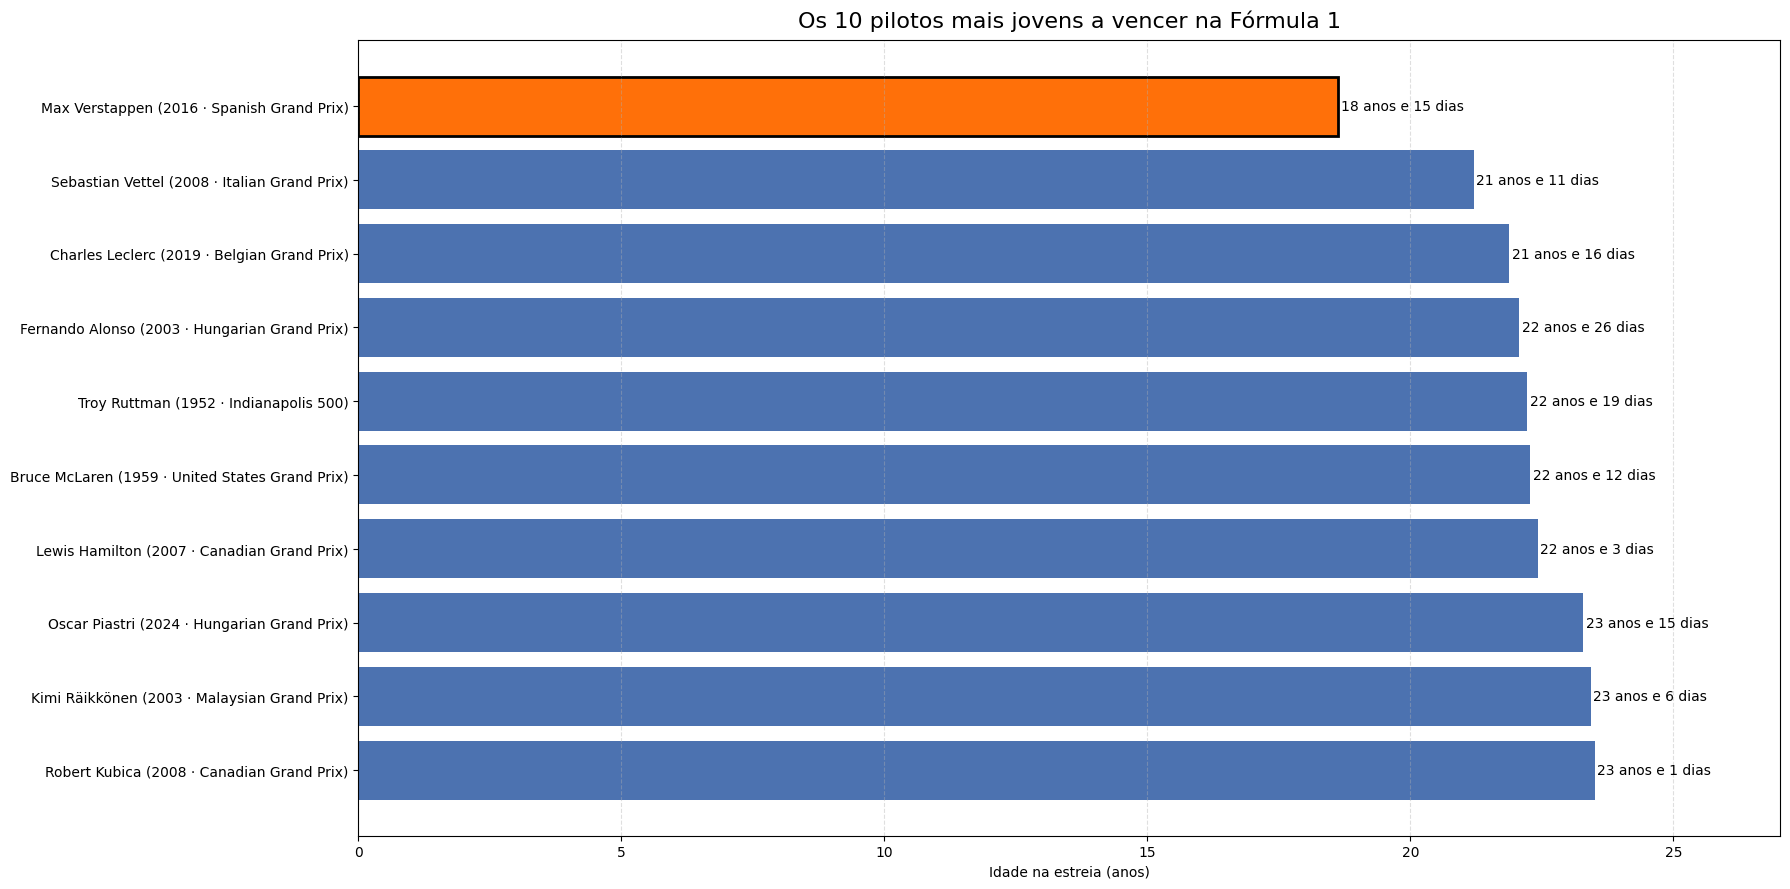

In [12]:
fxns.gera_graf_top_10_mais_jovens(df_top_10_jovens_vencedores, "Os 10 pilotos mais jovens a vencer na Fórmula 1", "Idade na estreia (anos)", "Verstappen")

## Mas... e desde então?

Beleza, acima conseguimos ver que o Verstappen não só foi o mais jovem estreante da F1 mas também foi o mais jovem a ganhar uma corrida, um ano após a sua estreia.

Mas, desde então, se fizermos uma visão geral dos números de vitórias, poles etc, Verstappen continua tendo marcas interessantes? Vamos dar uma olhada em alguns números gerais e a partir disso podemos ir aprofundando as nossas análises.

### Pole Positions:

In [13]:
df_pole_positions = df_races[df_races['starting_position'] == 1].copy()

df_pole_positions_agrup = df_pole_positions.groupby('driver_full_name').agg(
    {
        'race_name': 'count',
        'driver_age_at_race': 'max'
    }
).rename(columns={'race_name': 'pole_positions', 'driver_age_at_race': 'oldest_pole_position_age'}).reset_index().sort_values(by='pole_positions', ascending=False)

df_pole_positions_agrup

,driver_full_name,pole_positions,oldest_pole_position_age
64,Lewis Hamilton,104,38.537988
72,Michael Schumacher,68,37.530459
4,Ayrton Senna,65,34.110883
99,Sebastian Vettel,57,32.279261
71,Max Verstappen,46,27.975359
...,...,...,...
104,Thierry Boutsen,1,33.081451
105,Tom Pryce,1,26.102669
108,Vittorio Brambilla,1,37.571526
109,Walt Faulkner,1,30.283368


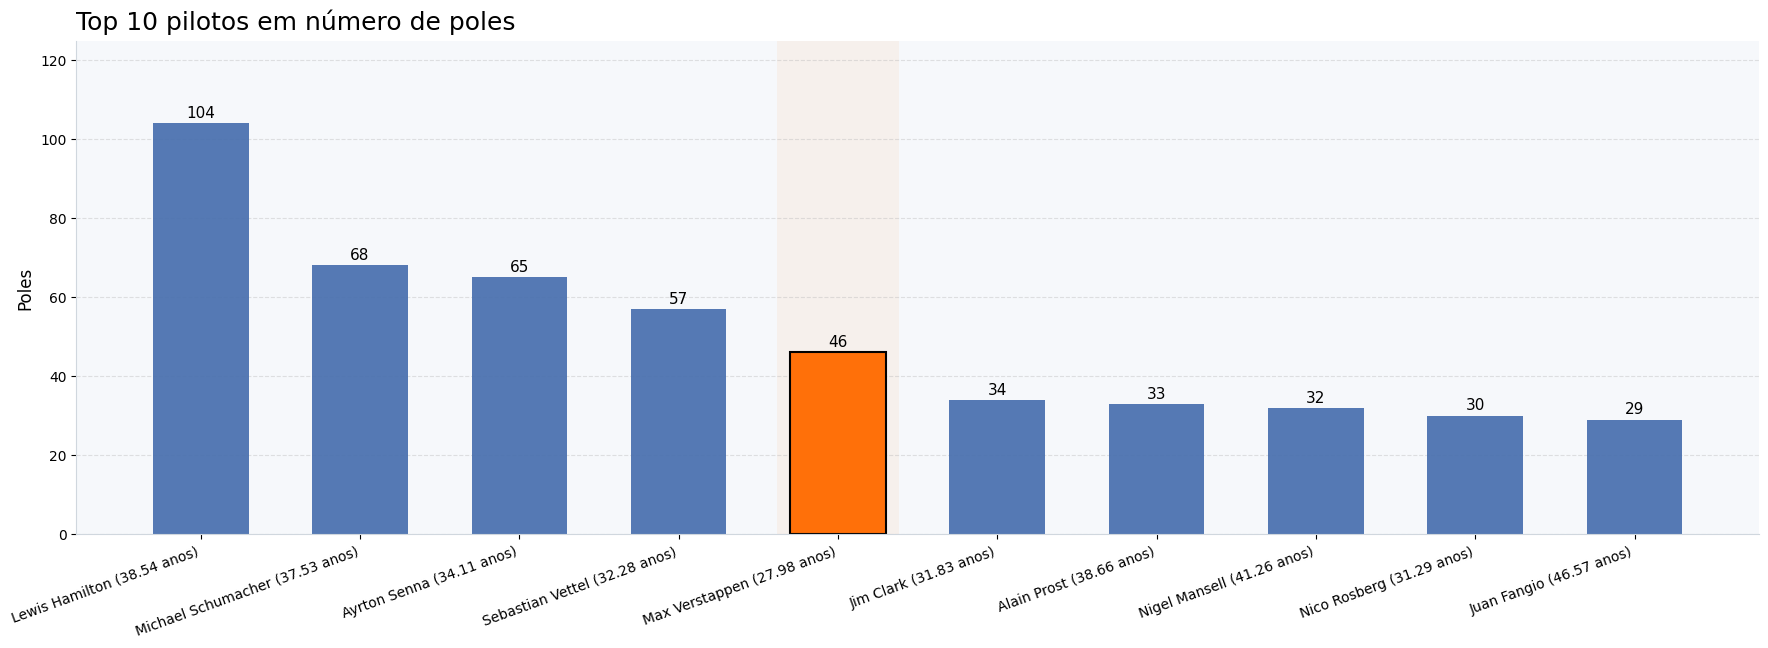

In [14]:
# Vamos tornar isso visual pra ficar mais fácil de expor a informação:

df_poles_top10 = df_pole_positions_agrup.head(10).copy()

df_poles_top10['nome_e_idade'] = df_poles_top10.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_pole_position_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_poles_top10,
    col_nome="nome_e_idade",
    col_valor="pole_positions",
    titulo="Top 10 pilotos em número de poles",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


Acima não só podemos ver que o Verstappen é o número 5 em maior quantidade de pole positions na história da F1, como também ele é o mais jovem entre todos os pilotos que estão presentes na lista dos Top 10, sendo aproximadamente 5 anos mais jovem do que o 2o piloto mais jovem que seria o Nico Rosberg.

**Obs**.: a idade apresentada é a idade do piloto ao conseguir sua última pole presente na base de dados, faço assim pra tentar nivelar a comparação, ou seja, considero apenas a idade do piloto enquanto ele estava aumentando sua estatística de pole position.

O piloto que chega mais perto de Verstappen em termos de idade e que possui um volume bem considerável de pole positions seria o Leclerc, que cairia bem no Top 11. Porém, possui 26 pole positions, que equivale a 65% da quantidade de pole positions de Max Verstappen:

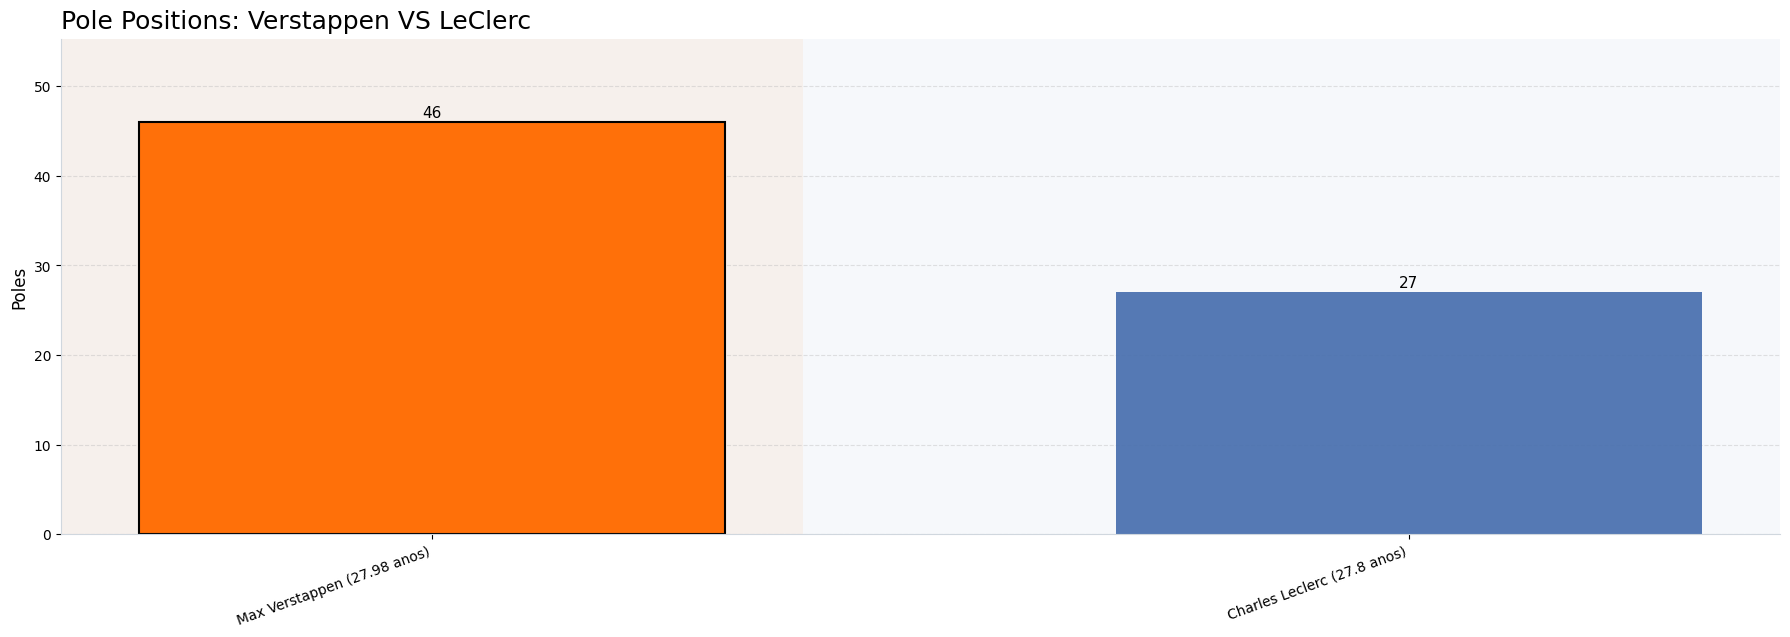

In [15]:
df_poles_ver_lec = df_pole_positions_agrup[df_pole_positions_agrup['driver_full_name'].str.contains('Verstappen|Leclerc', case=False, na=False)].copy()

df_poles_ver_lec['nome_e_idade'] = df_poles_ver_lec.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_pole_position_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_poles_ver_lec,
    col_nome="nome_e_idade",
    col_valor="pole_positions",
    titulo="Pole Positions: Verstappen VS LeClerc",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


### Vitórias:

In [16]:
# Filtro a vitória a partir da posição de chegada:
df_race_wins = df_races[df_races['finishing_position'] == 1].copy()

# Agrupo pra calcular as métricas:
df_race_wins_agrup = df_race_wins.groupby('driver_full_name').agg(
    {
        'race_name': 'count',
        'driver_age_at_race': 'max'
    }
).rename(columns={'race_name': 'race_wins', 'driver_age_at_race': 'oldest_race_win_age'}).reset_index().sort_values(by='race_wins', ascending=False)

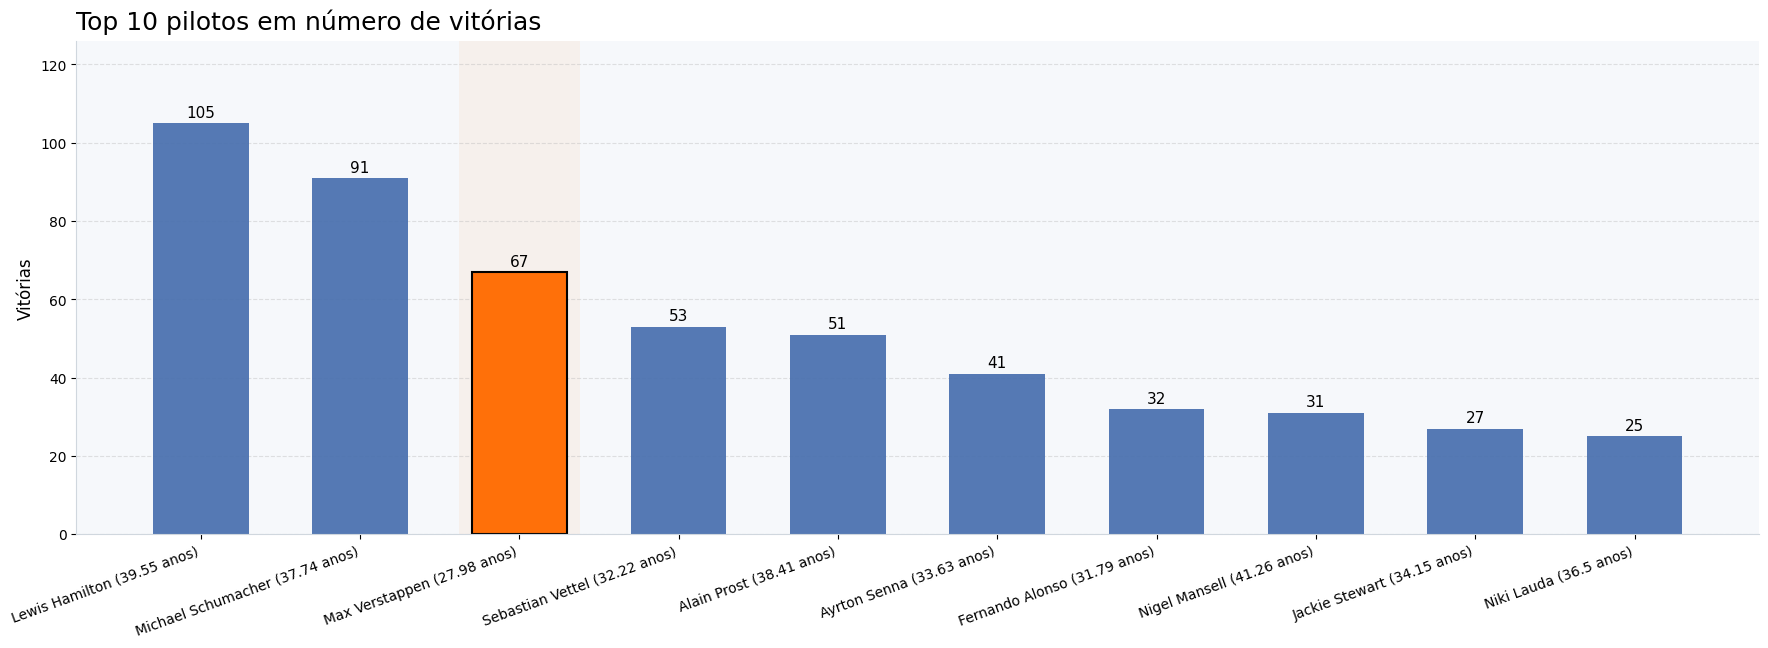

In [17]:
# Vamos tornar isso visual pra ficar mais fácil de expor a informação:

df_race_wins_top_10 = df_race_wins_agrup.head(10).copy()

df_race_wins_top_10['nome_e_idade'] = df_race_wins_top_10.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_race_win_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_race_wins_top_10,
    col_nome="nome_e_idade",
    col_valor="race_wins",
    titulo="Top 10 pilotos em número de vitórias",
    xlabel="Vitórias",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


Bom, eu acho que o gráfico acima nem precisa de muita explicação. Podemos ver que o Verstappen é o 3o piloto com maior número de vitórias da história e é o mais jovem por uma margem de 5 anos na lista, sendo que Vettel é o segundo mais jovem na lista de top 10, com 10 vitórias a menos ao final de 2024, ano no qual Vettel está aposentado e Verstappen continua correndo em 2025.

### E se olharmos em termos percentuais?

In [18]:
# Posso trazer a quantidade total de corridas de cada piloto pro dataset que usei pra ver as vitórias e calcular um percentual

df_driver_total_races = df_races.groupby('driver_full_name').agg({'race_name':'count'}).rename(columns={'race_name':'total_races'})


df_race_wins_agrup = pd.merge(
    left=df_race_wins_agrup,
    right=df_driver_total_races,
    on='driver_full_name',
    how='left'
)

df_race_wins_agrup['win_percentage'] = df_race_wins_agrup['race_wins'] / df_race_wins_agrup['total_races']

In [19]:
# Vamos dar uma olhada nos top 10 maiores percentuais de vitórias:

df_top_10_win_percentages = df_race_wins_agrup[
    df_race_wins_agrup['total_races'] > 100 # Aqui, tentando complicar um pouco a análise, vou trazer apenas pilotos que tem um grande número de corridas feitas
].sort_values(by='win_percentage', ascending=False).head(10)

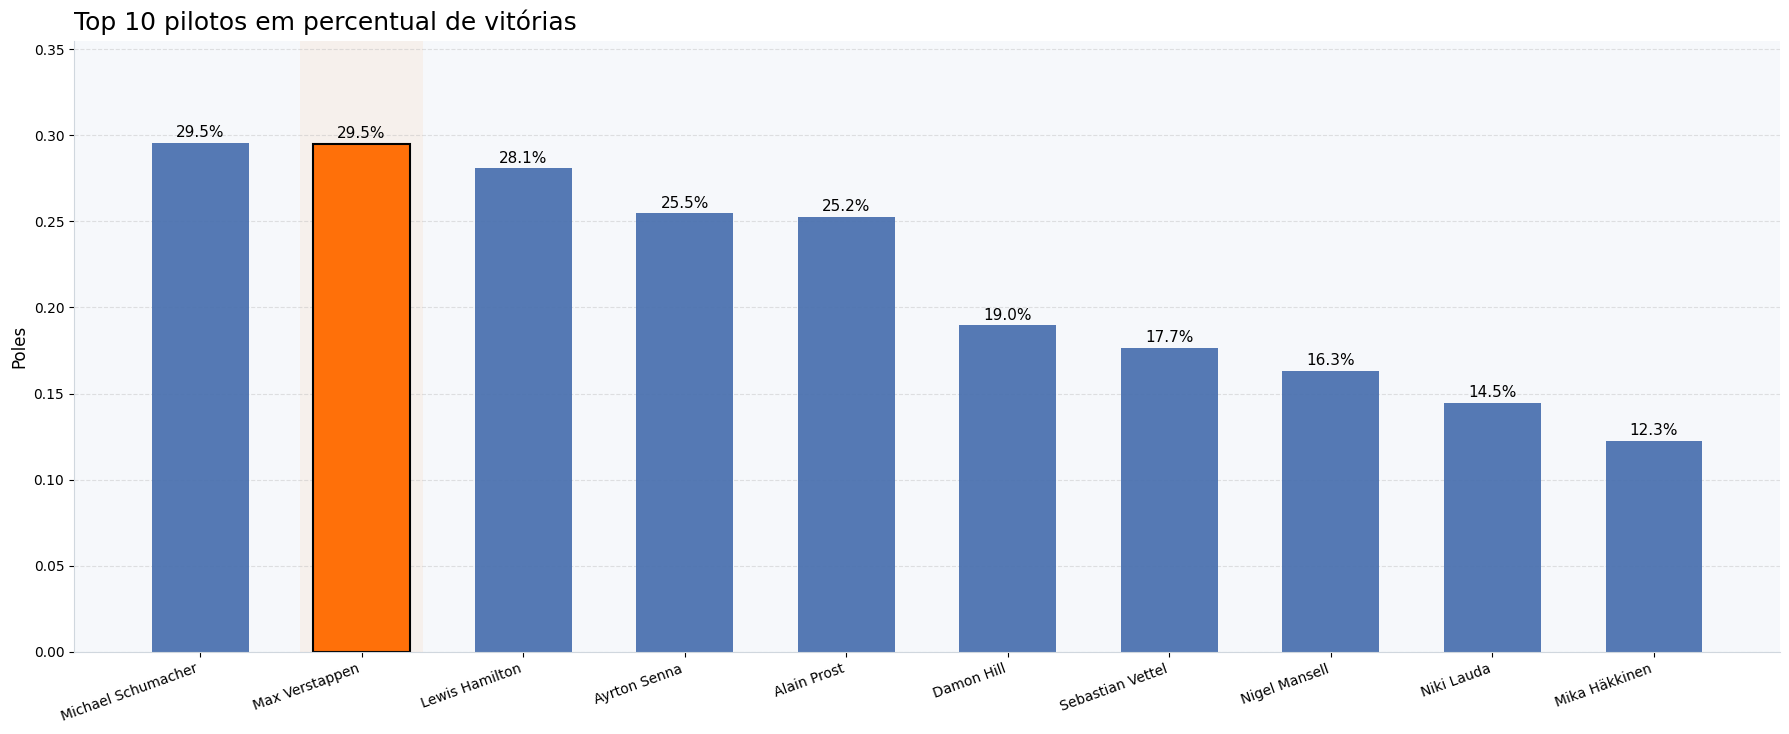

In [20]:
df_top_10_win_percentages['nome_e_idade'] = df_top_10_win_percentages.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_race_win_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_top_10_win_percentages,
    col_nome="driver_full_name",
    col_valor="win_percentage",
    titulo="Top 10 pilotos em percentual de vitórias",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
    valor_format_str="{:.1%}"
)

Hoje, Verstappen está empatado em maior percentual de vitórias com ninguém mais ninguém menos do que Michael Schumacher

# Mas e aí?

Todos esses números apresentados até agora são lindos e maravilhosos. Independente de qualquer contraponto, não há de se discutir que o Verstappen hoje em dia é um piloto mais do que consolidado e está entre os maiores nomes que a F1 já teve em sua história.

Porém... Tudo que trouxe até agora são só grandes números, estou comparando valores absolutos com outros pilotos sem isolar um grande fator: a equipe.

A F1, apesar de certas pessoas esquecerem às vezes, não é uma competição apenas entre pilotos, mas também uma competição de construtores (equipes), que acabam por influenciar muito o resultado individual de cada piloto, e aí a questão é a seguinte: como poderíamos tentar isolar esse fator em uma análise?

É muito difícil, mas acredito que com algumas premissas, consigo prosseguir a análise de forma a tentar fazer isso de duas formas: primeiro posso analisar a consistência de tempo de volta dos pilotos (um piloto bom tem que ser um piloto que consegue entregar resultado nos momentos mais importantes e que tem tempos de volta consistentes), e, além disso, podemos comparar os pilotos diretamente com os companheiros de equipe que tiveram, sendo que ambos possuem o mesmo equipamento (premissa importante).

Então agora, pretendo prosseguir a análise sem aprofundar em grandes números absolutos, mas indo um passo adiante na análise, entrando mais em detalhe nos números...

## Análise de Consistência:

A ideia aqui vai ser tentar fazer uma análise da consistência do piloto ao longo das corridas que participou. E eu não quero fazer isso em torno de uma análise de resultados, mas sim de tempos de volta, porque resultados, novamente, podem ser muito influenciados por externalidades (questões mecânicas, performance da equipe etc), mas, em tese, quem tem mais influência na consistência do tempo de volta, seja ele bom ou ruim, é o piloto. Então vamos lá:

Passos para análise de consistência:

- Preciso remover voltas que não seriam interessantes eu considerar do dataset pra analisar apenas tempo de volta válida (não quero voltas lentas de SC, ou que o piloto tenha parado no Box poluindo a análise);
- Depois vou calcular o desvio padrão usando a window de prova e piloto (quero o desvio padrão que cada piloto teve em cada prova);
- Análise da distribuição desse desv. pad. -> A "largura" da distribuição vai nos dizer algo sobre a consistência;
- Análise da média do desvio padrão 0-> quanto maior a média, maior a inconsistência

Obs.: Não sei se vou conseguir fazer uma análise da base toda de uma vez, porque vai ter pilotos com poucas corridas etc que vão atrapalhar a análise. Nesse caso, possivelmente só vai fazer sentido eu comparar pilotos diretamente comparáveis da era atual e nomes maiores que sabemos que são considerados grandes pilotos da F1.

### Fazendo o tratamento do dataset:

#### Primeiro quero tentar tirar as voltas de *Safety Car*: 

Vou tentar fazer isso por meio de uma abordagem "heurística" (porque não tenho nenhuma indicação disso no meu dataset): Eu vou calcular a mediana do tempo de volta de uma corrida e vou comparar com a volta do piloto usando um *threshold*, quando o tempo de volta ultrapassar esse valor (que acontece quando a volta, em tese, é BEM mais lenta que uma volta normal), e vou colocar a condição pra verificar que seja uma volta em que o piloto não perdeu posições (se ele rodou, o tempo de volta vai ser maior mas ele vai ter perdido posições, se for um SC por um motivo externo, ele não deveria perder posições).

Dessa forma (digo isso depois de ter feito essa análise algumas vezes e olhado repetidamente o dataset resultante), acredito que eu tenha conseguido, da melhor forma que pensei, retirar voltas que são lentas por motivos de corrida, mas ao mesmo tempo, manter voltas em que o piloto possa ter cometido algum erro ou então ter sido mais lento por falta de consistência mesmo. Ou seja, erros que o piloto cometeu serão "punidos" por meio da forma que estou fazendo esta análise.

In [21]:
df_lap_times = fxns.identificar_voltas_safety_car(
    df_laps=df_lap_times,
    threshold_percent=1.20 # Pra eu considerar como volta de SC, o ritmo tem que ter diminuído em pelo menos 20% (chute com critério em breves pesquisas)    
    )

# Aqui existe o 107% que seria baseado na regra de pace da F1, mas a ideia aqui é tentar não filtrar voltas de erro individual e também de voltas mais lentas onde pode haver chovido e dpeois secado etc

b:\projetos\f1_analytics\notebooks\utils.py:483: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_lap_before_sc = df_out.assign(_is_sc_lap=is_sc_lap).groupby(group_cols)['_is_sc_lap'].shift(-1).fillna(False)


In [22]:
# Vamos fazer um "check de sanidade" nessa flag que eu acabei de criar:

df_check_sc = df_lap_times.groupby(
    by=[
        'race_name',
        'race_date',
        'is_safety_car_lap'
    ]
).agg({
    'lap_time_ms':'mean'
}).reset_index()

In [23]:
df_check_sc.sort_values('lap_time_ms', ascending=False)

,race_name,race_date,is_safety_car_lap,lap_time_ms
313,British Grand Prix,2014-07-06,True,3.041607e+06
365,Canadian Grand Prix,2011-06-12,True,6.014643e+05
747,Malaysian Grand Prix,2012-03-25,True,5.616817e+05
707,Korean Grand Prix,2010-10-24,True,3.078142e+05
811,Monaco Grand Prix,2011-05-29,True,2.644613e+05
...,...,...,...,...
112,Austrian Grand Prix,2019-06-30,False,7.058727e+04
110,Austrian Grand Prix,2018-07-01,False,7.047956e+04
108,Austrian Grand Prix,2017-07-09,False,7.041059e+04
985,Styrian Grand Prix,2020-07-12,False,7.003729e+04


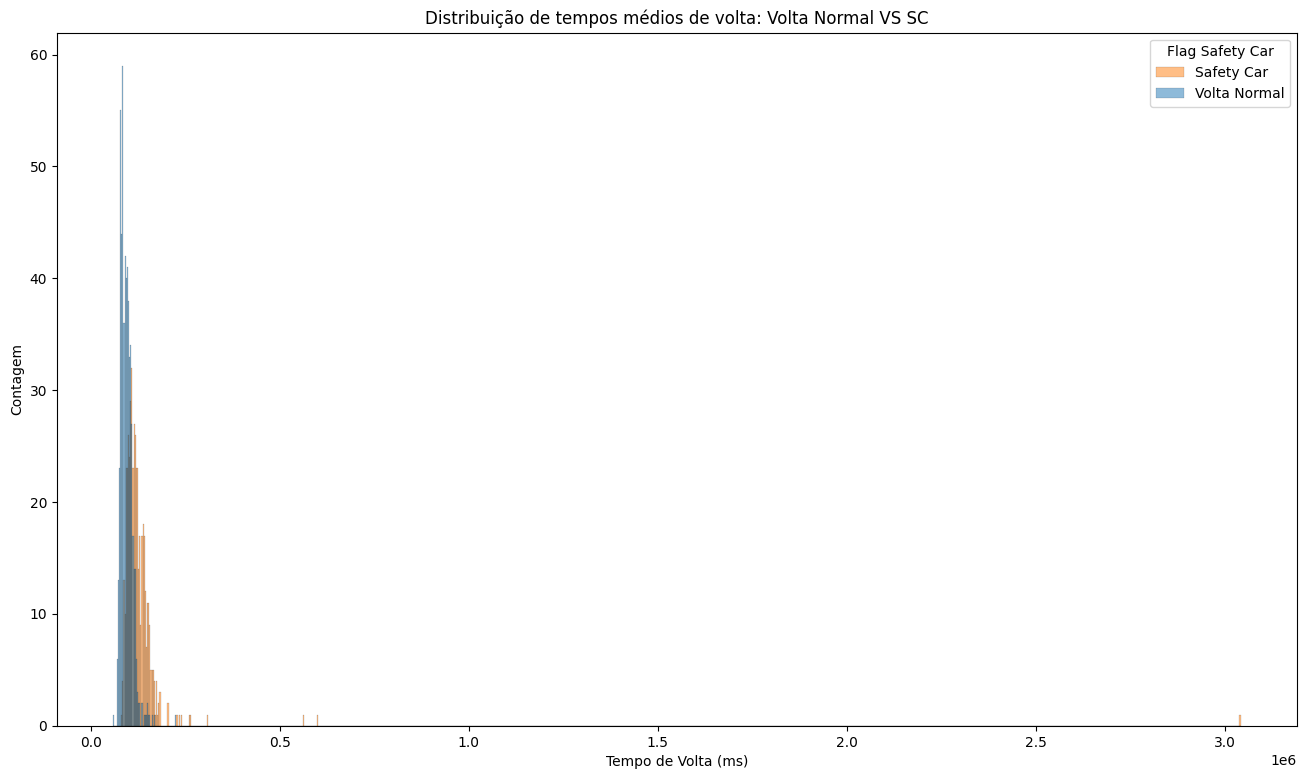

In [24]:
fig, ax = plt.subplots(figsize=(16,9))

sns.histplot(
    data=df_check_sc,
    x='lap_time_ms',
    hue='is_safety_car_lap',
    bins=1000,
    ax=ax
)

ax.set_title('Distribuição de tempos médios de volta: Volta Normal VS SC')
ax.set_xlabel('Tempo de Volta (ms)')
ax.set_ylabel('Contagem')
ax.legend(title='Flag Safety Car', labels=['Safety Car', 'Volta Normal'])

É difícil fazer uma validação plena da informação acima, mas, vendo o gráfico, conseguimos observar que as voltas classificadas como lentas (Safety Car) estão mais esparsas e mais lentas que as voltas normais, que são maiores em quantidade e mais concentradas, o que vai em linha com o esperado, portanto, considero que a flag está fazendo sentido no momento.

### Removendo voltas a serem desconsideradas na análise:

Na minha visão, para análises de tempo de volta, tenho que tirar:
- Voltas de SC, que foi as que indicamos acima;
- Primeiras voltas, sendo que não são representativas do ritmo de corrida ao longo das demais voltas;
- Voltas em que o piloto parou no pit stop ou saiu do pit stop, e isso, conseguimos ter a indicação a partir do dataset de pit stop, sendo que previamente já incluimos uma flag pra identificar esses casos;
- Removo eventos em que o piloto não terminou (geralmente a última volta possui valores bem elevados nesses casos).

In [25]:
df_lap_times_valid = fxns.filtrar_voltas_para_analise(df=df_lap_times)

### Criando uma métrica de consistência

Agora que tenho o meu dataset "limpo", vou tentar calcular a consistência do piloto por meio do desvio padrão (é uma métrica de variação) do tempo de volta de cada piloto em cada etapa. A ideia aqui é a seguinte:

- Analisar a distribuição do desvio padrão -> Quanto mais agrupada a distribuição em menores valores, significa que o piloto é mais consistente entre as diferentes corridas.
- Analisar a média do desvio padrão -> Quanto menor o o valor, significa que o piloto possui maior consistência entre as diferentes corridas.

A questão (depois de já ter tentado fazer essa análise algumas vezes) é que algumas corridas tem um desvio padrão de tempo de volta muito alto por natureza, e isso acaba atrapalhando bem a análise em certas comparações (corridas em que há mudança de clima possuem um alto desvio padrão natural embutido), então, o que terei que fazer é uma espécie de **"normalização relativa"** dos desvios padrões da seguinte forma:

- Calcularei os desvios padrões de cada piloto em cada evento, e farei a média geral desses valores também, irei então, calcular a diferença entre o desvio padrão do piloto e a média dos desvios padrões entre os pilotos, assim, eu vou beneficiar os pilotos que possuirem maior consistência (menor variação do tempo de volta) contra a variação "inerente" (representada pela média dos desvios padrões).

Vamos lá e vou tentar deixar claro conforme eu for chegando em conclusões:

In [26]:

# Vou agrupar o dataset, calculando tempo de volta médio e desvio padrão para cada piloto, em cada corrida
df_lap_times_std = (
    df_lap_times_valid.groupby(['race_name', 'year', 'driver_full_name'])['lap_time_ms']
    .agg(['std', 'mean'])
    .rename(columns={'std': 'lap_time_std', 'mean': 'lap_time_mean'})
    .reset_index()
)

# Aí aqui eu calculo o desvio padrão médio de todos os pilotos pra cada corrida
df_lap_times_std['lap_time_std_mean'] = df_lap_times_std.groupby(['race_name', 'year'])['lap_time_std'].transform('mean')

# Crio minha métrica de consistência, fazendo a diferença entre o desvio padrão do piloto contra o desvio padrão geral
df_lap_times_std['lap_time_std_driver_vs_mean'] = df_lap_times_std['lap_time_std'] - df_lap_times_std['lap_time_std_mean']

# Se o valor resultante é negativo, significa que o desvio padrão do piloto é menor que o médio, ou seja, foi mais consistente
df_lap_times_std

,race_name,year,driver_full_name,lap_time_std,lap_time_mean,lap_time_std_mean,lap_time_std_driver_vs_mean
0,70th Anniversary Grand Prix,2020,Alexander Albon,1549.280959,91788.659574,1120.971797,428.309162
1,70th Anniversary Grand Prix,2020,Carlos Sainz,1092.583107,92355.744681,1120.971797,-28.388690
2,70th Anniversary Grand Prix,2020,Charles Leclerc,1102.407961,91942.979592,1120.971797,-18.563837
3,70th Anniversary Grand Prix,2020,Daniil Kvyat,1271.997637,92375.425532,1120.971797,151.025840
4,70th Anniversary Grand Prix,2020,Esteban Ocon,1102.583734,92689.326531,1120.971797,-18.388063
...,...,...,...,...,...,...,...
5352,United States Grand Prix,2024,Max Verstappen,724.766712,99301.780000,1115.039457,-390.272744
5353,United States Grand Prix,2024,Nico Hülkenberg,1248.924967,100093.760000,1115.039457,133.885510
5354,United States Grand Prix,2024,Oscar Piastri,1125.157024,99355.720000,1115.039457,10.117567
5355,United States Grand Prix,2024,Pierre Gasly,1007.196723,100499.840000,1115.039457,-107.842734


Antes de qualquer coisa, vamos dar uma olhada na consistência do Verstappen pra eu explicar o que estou tentando analisar:

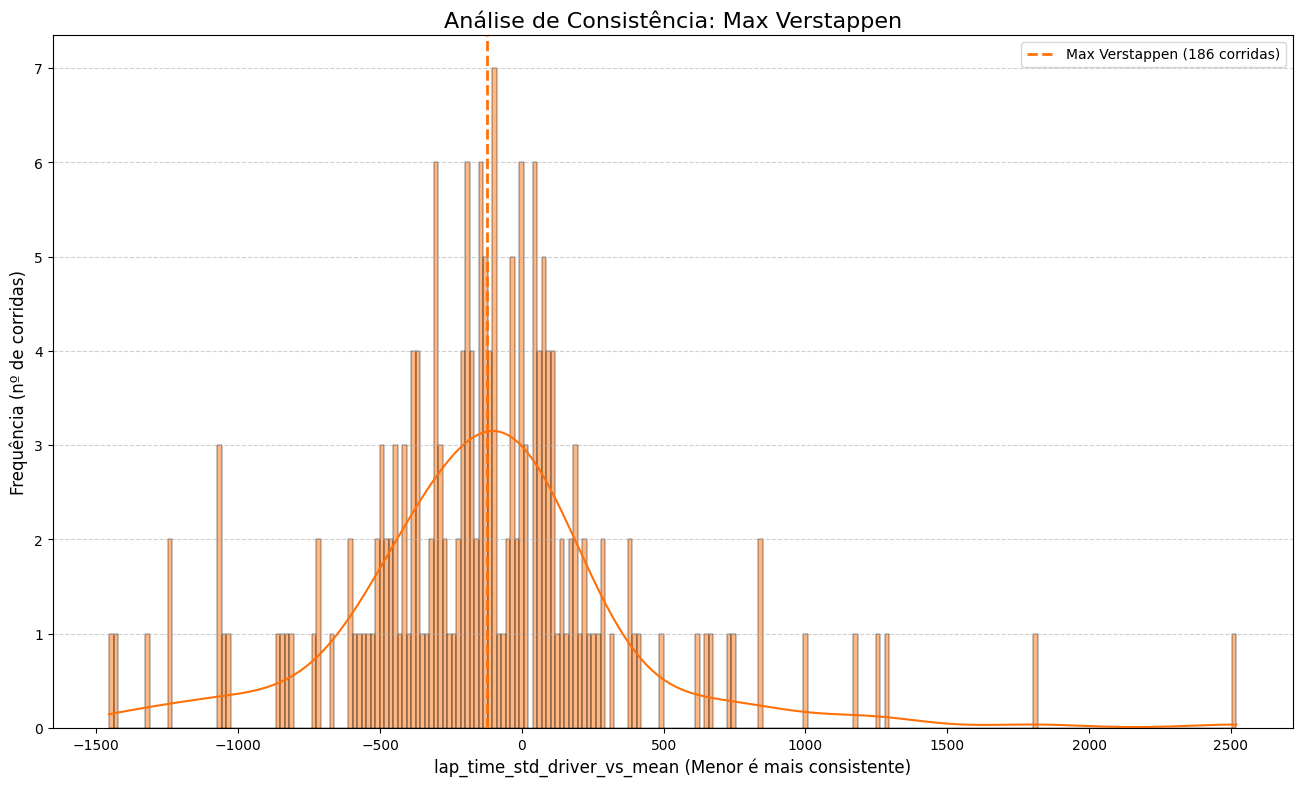

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))

df_plot = df_lap_times_std[df_lap_times_std['driver_full_name'].isin(['Max Verstappen'])]

# Define uma paleta de cores fixa para garantir consistência
cor_base = "#FF7009"      # Laranja para o piloto base (Verstappen)
palette = {'Max Verstappen': cor_base}

# Calcula o número de corridas
n_corridas_base = len(df_plot[df_plot['driver_full_name'] == 'Max Verstappen'])

# Plot do histograma e da curva de densidade (KDE)
sns.histplot(data=df_plot, x='lap_time_std_driver_vs_mean', bins=250, kde=True, ax=ax, color=cor_base)

# Adiciona linhas verticais para a média de cada piloto
media_base = df_plot[df_plot['driver_full_name'] == 'Max Verstappen']['lap_time_std_driver_vs_mean'].mean()

ax.axvline(media_base, color=cor_base, linestyle='--', linewidth=2, label=f'Média {'Max Verstappen'.split(" ")[-1]}: {media_base:.2f}')

# Títulos e rótulos
ax.set_title(f"Análise de Consistência: {'Max Verstappen'}", fontsize=16)
ax.set_xlabel(f"{'lap_time_std_driver_vs_mean'} (Menor é mais consistente)", fontsize=12)
ax.set_ylabel("Frequência (nº de corridas)", fontsize=12)

# Atualiza a legenda para incluir a contagem de corridas
handles, _ = ax.get_legend_handles_labels()
labels = [f'{'Max Verstappen'} ({n_corridas_base} corridas)'] + [h.get_label() for h in handles[2:]]
ax.legend(handles=handles, labels=labels)

ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Vou explicar o que eu estou trazendo aqui acima:

Neste gráfico, visualizamos a distribuição do 'lap_time_std_driver_vs_mean' para Max Verstappen. Essa métrica representa a diferença entre o desvio padrão de Max Verstappen e o desvio padrão médio de todos os pilotos em determinado evento.

A linha vertical tracejada indica a média dos valores de 'lap_time_std_driver_vs_mean' de Verstappen. Uma média menor que 0, que é o caso de Verstappen, significa que ele tende a ser mais consistente que a média dos pilotos.

Ou seja, amostras à esquerda dessa linha representam corridas em que o piloto foi mais consistente que a média, e os valores à direita indicam corridas em que a consistência foi abaixo da média (desvio padrão maior que a média). O ideal é observar uma concentração maior de corridas à esquerda, sinalizando que, na maior parte do tempo, o piloto manteve um desempenho consistente, em que seus tempos de volta variaram menos que a média. 

**Importante**: os dados que estou olhando no momento **não** refletem a RAPIDEZ do piloto, mas sim são um reflexo de CONSISTÊNCIA. Ou seja, valores a esquerda não significam voltas mais rápidas, mas sim que os tempos de volta oscilaram menos do que de outros pilotos. Vou olhar performance, tempos de volta de uma outra forma logo depois...

### Comparando com outros pilotos

Agora que expliquei o que estou tentando fazer aqui, eu posso fazer comparação entre a distribuição que vimos acima de Verstappen, com uma média menor do que 0 e com uma distribuição aparentemente concentrada em torno do 0, com demais pilotos, vendo como as coisas se comparam.

O que queremos ver aqui decorre do que expliquei acima:

- Menor média = maior consistência
- Distribuição concentrada = pouca variação do tempo de volta e pequena quantidade de erros
- Amostras presentes mais à esquerda = consistência maior que a média
- Amostras à direita = pior consistência do que a média e possível presença de erros
- Cauda alongada à direita = possíveis amostras nas quais o piloto cometeu algum erro e perdeu posições

etc...

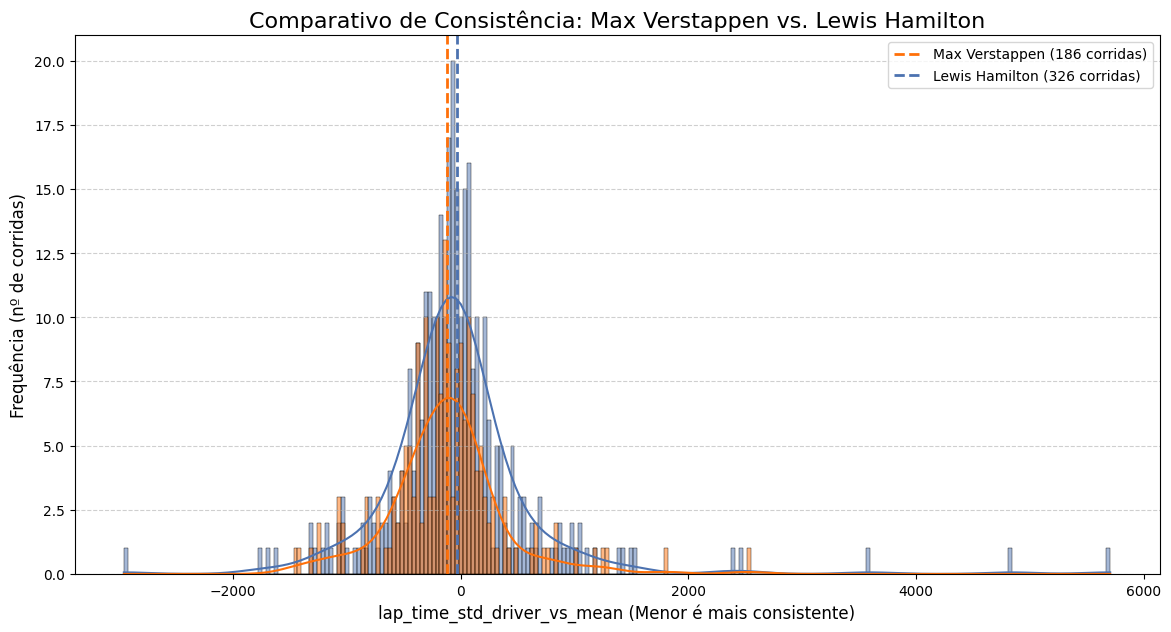

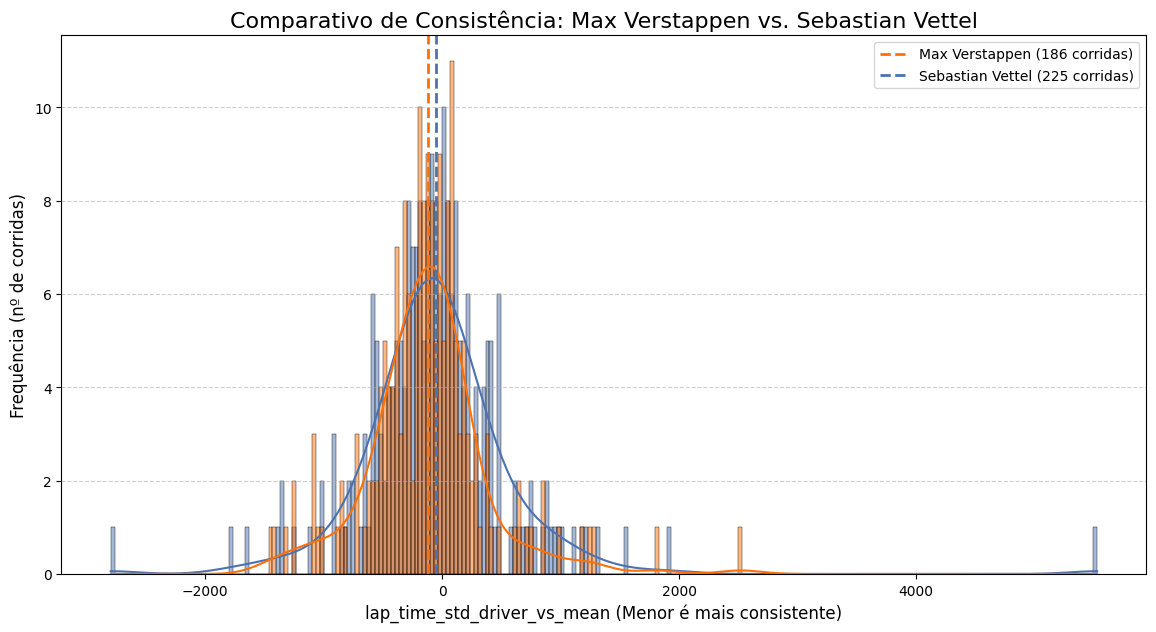

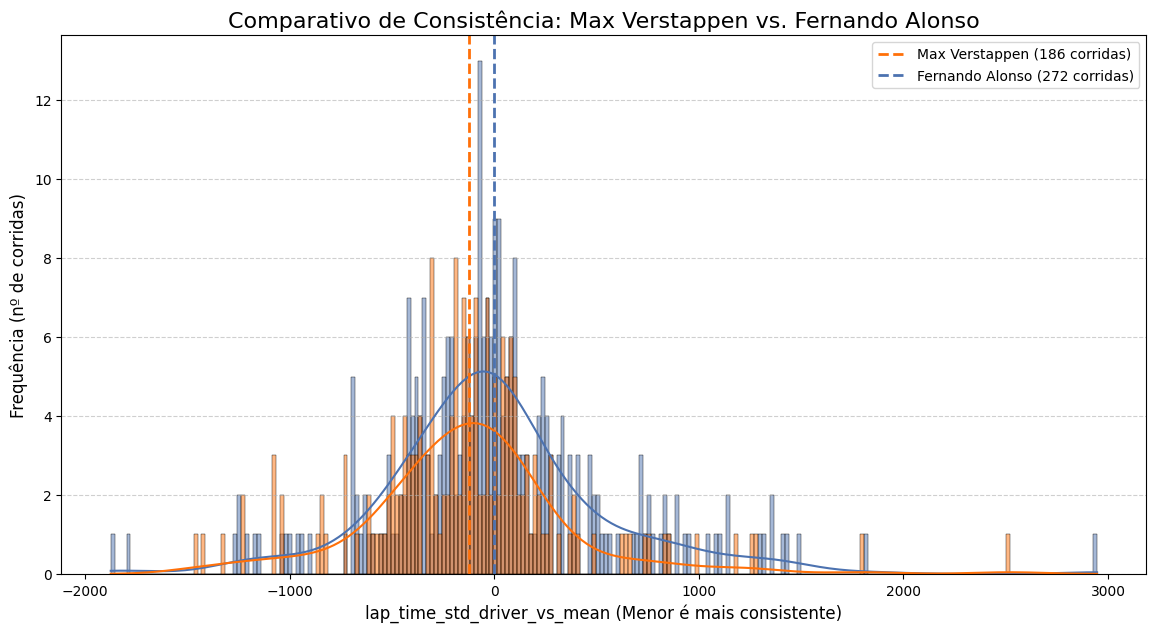

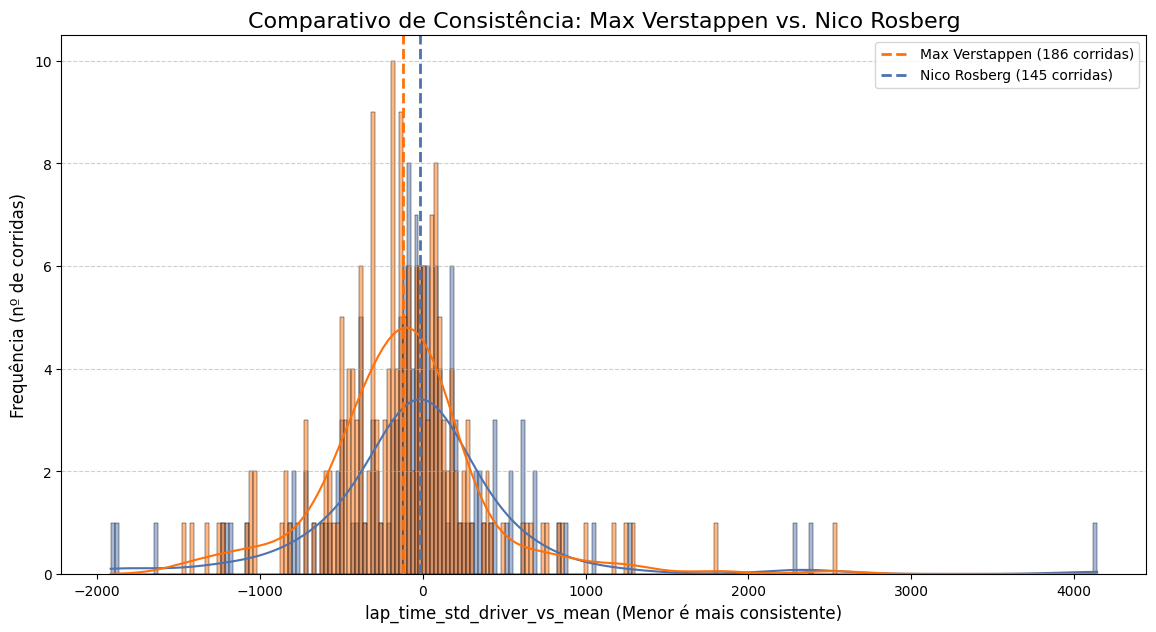

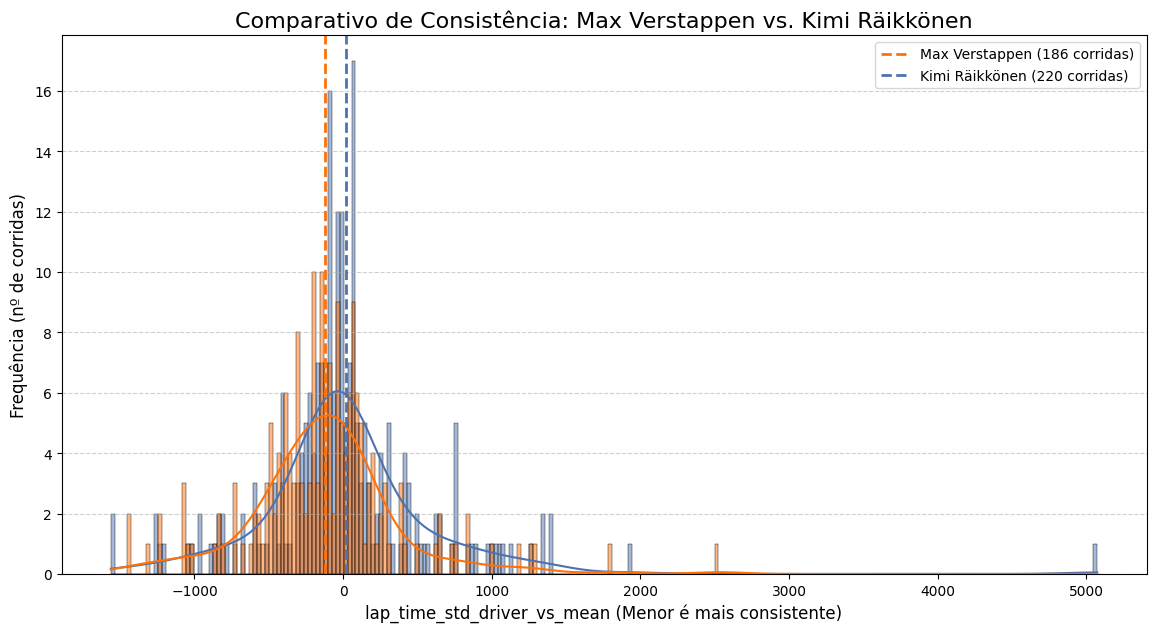

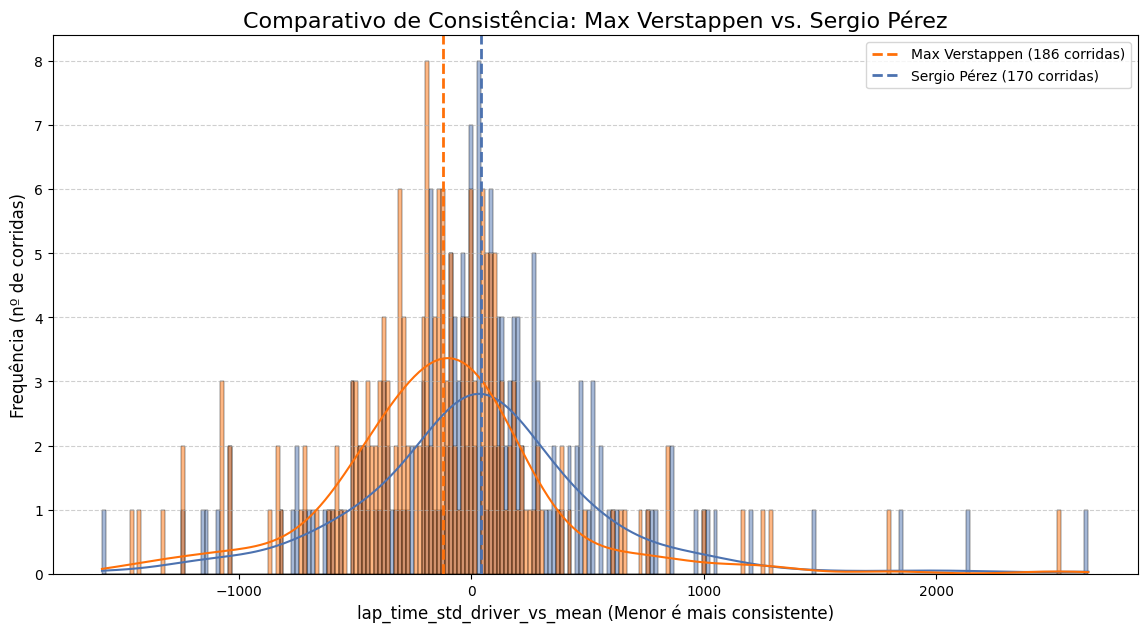

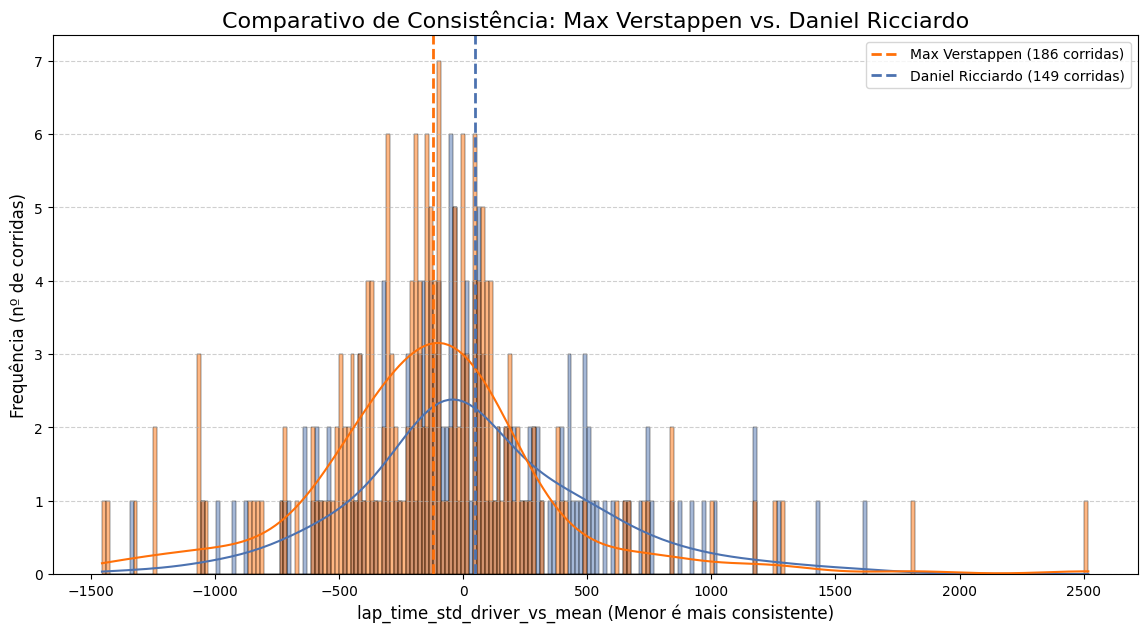

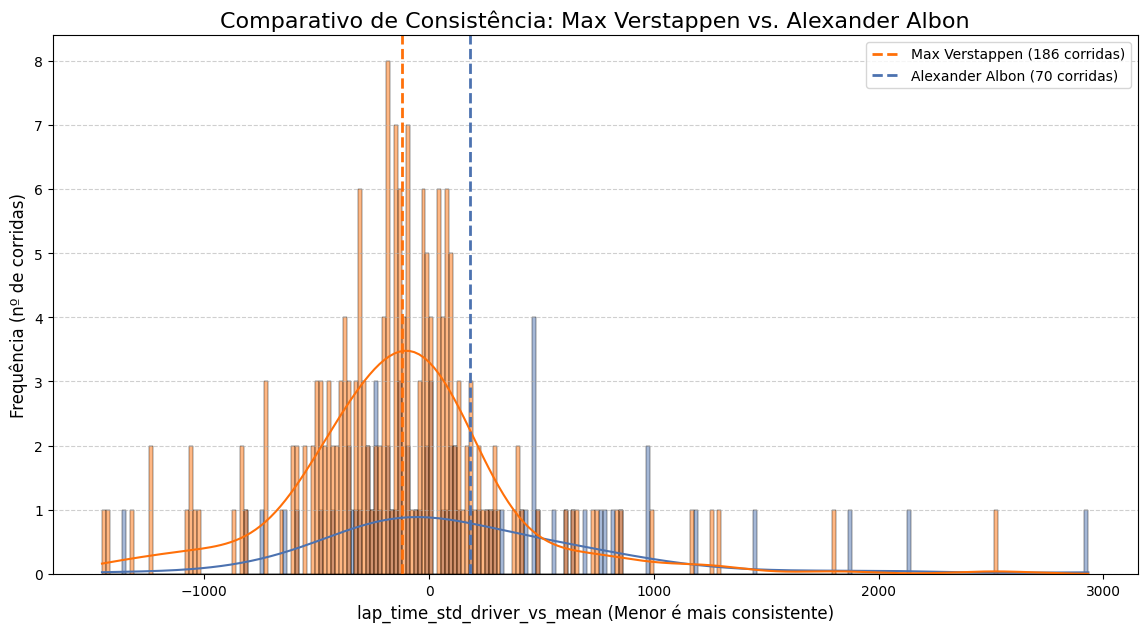

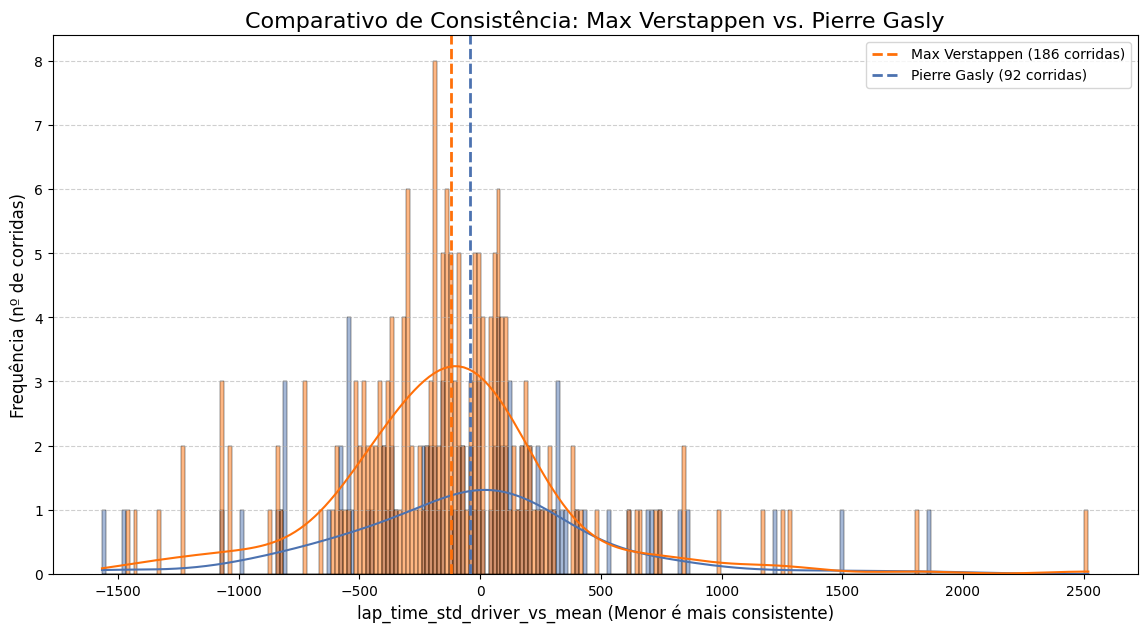

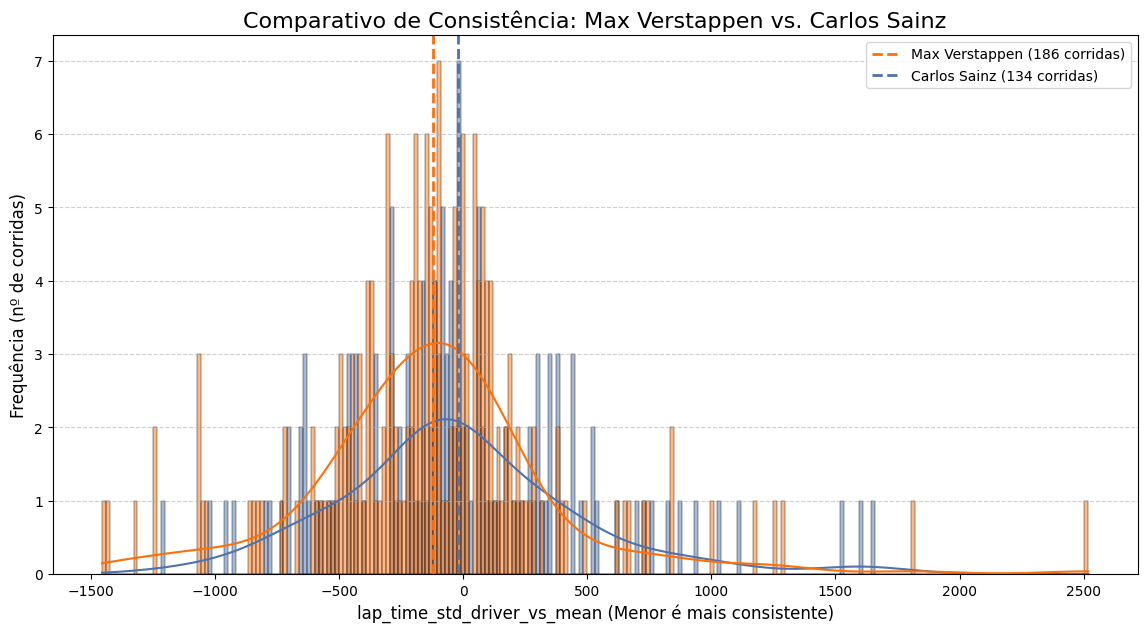

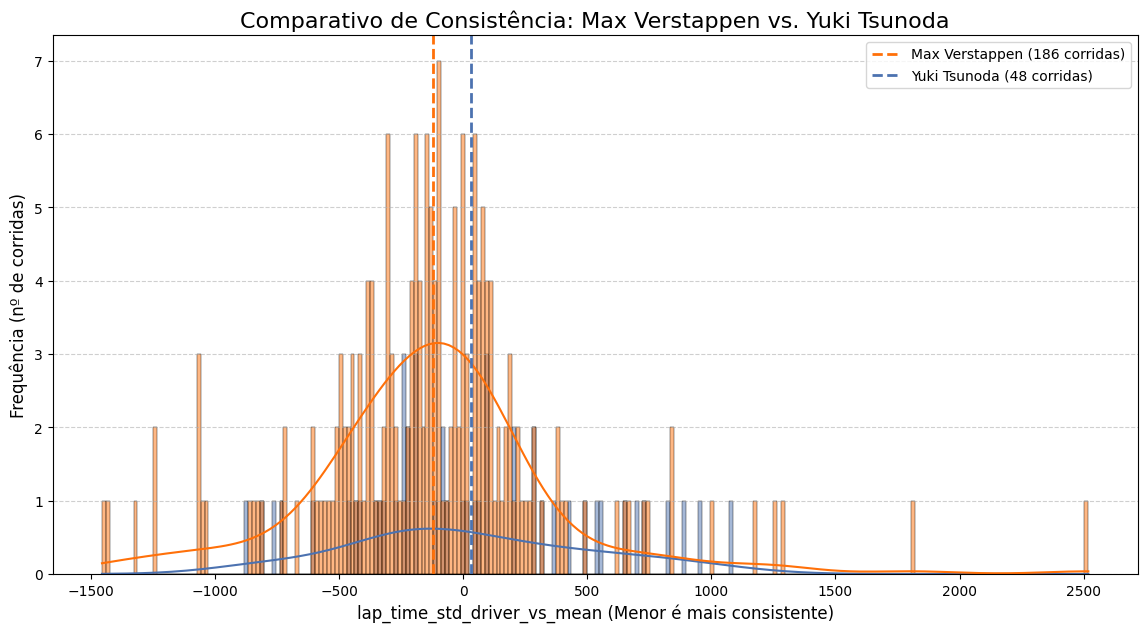

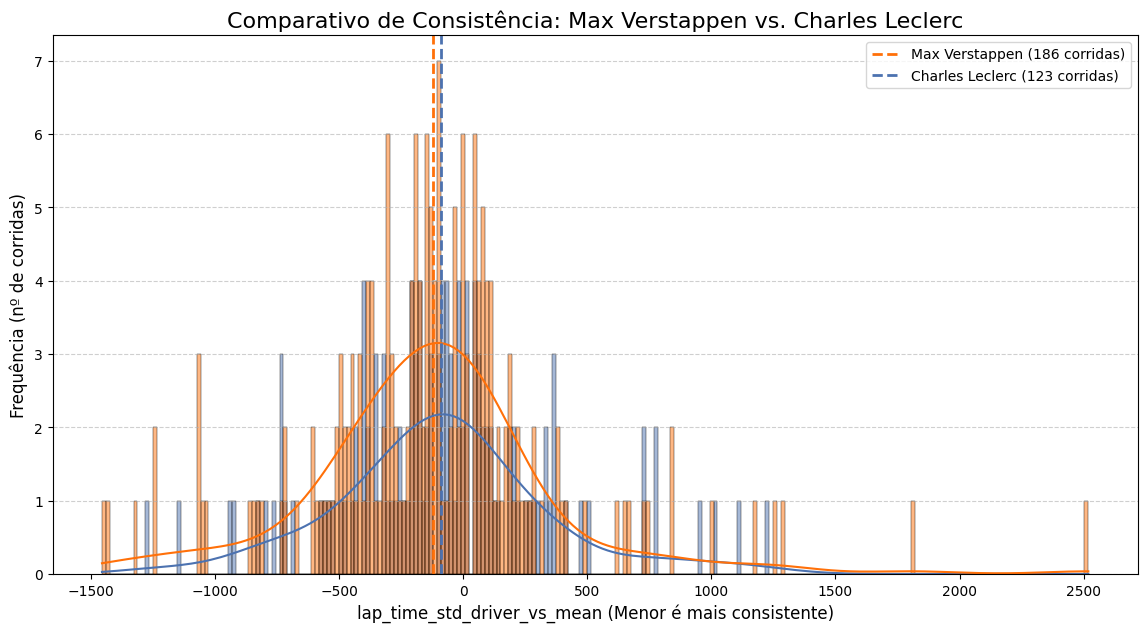

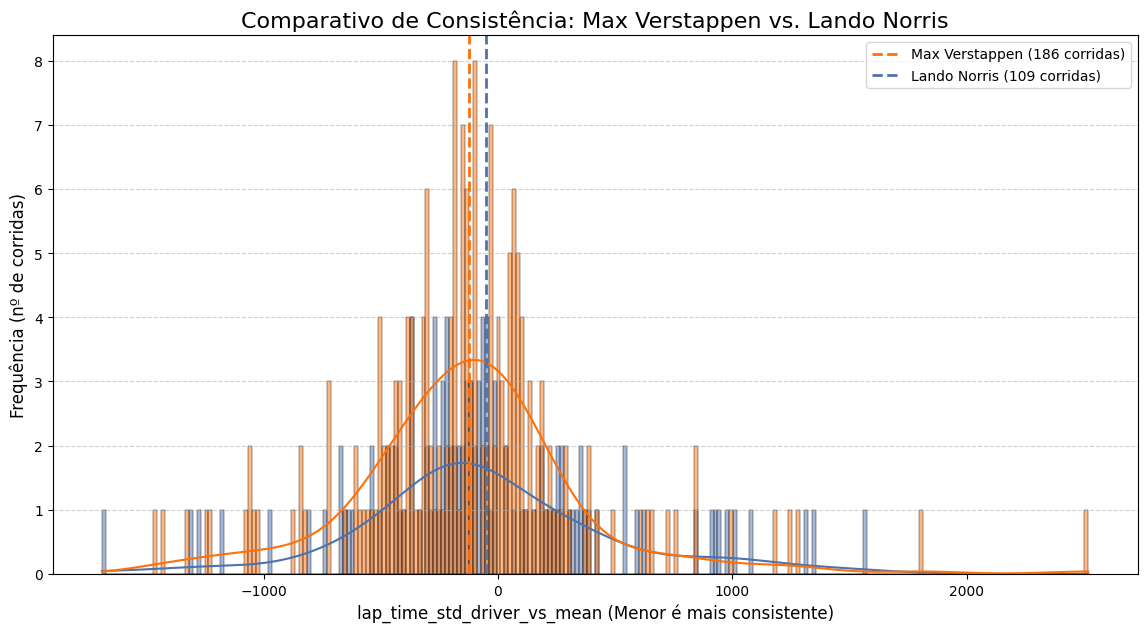

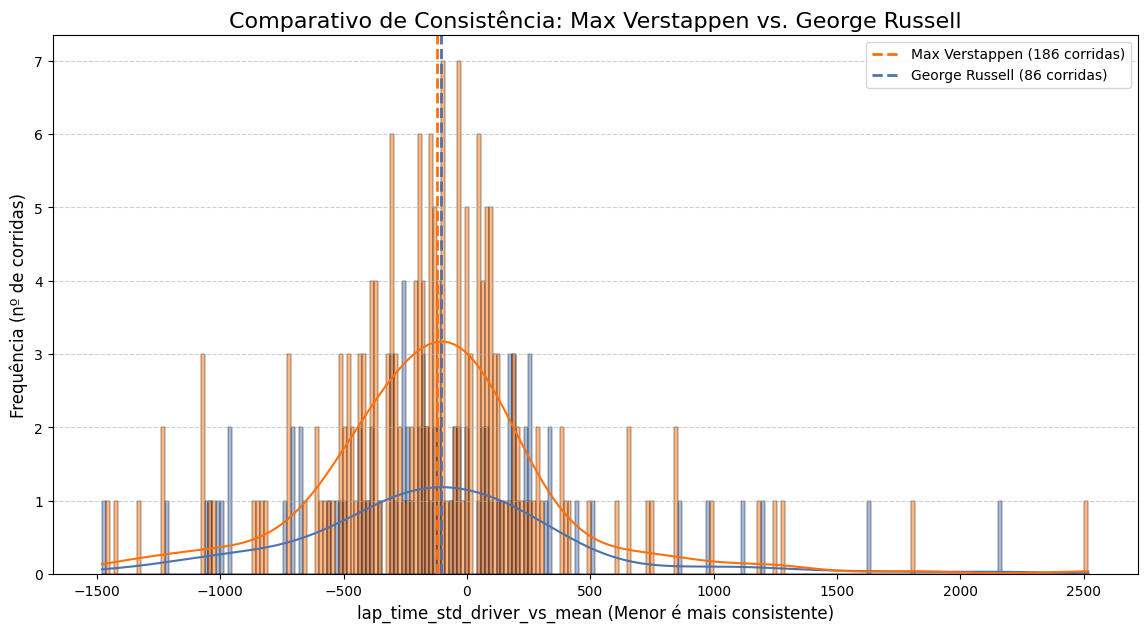

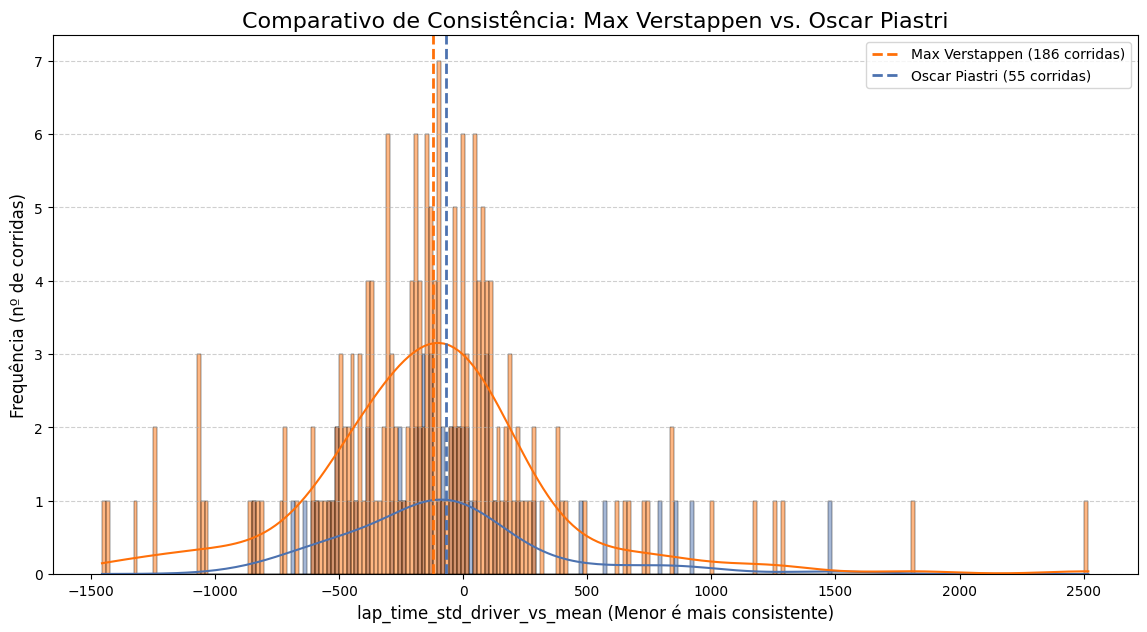

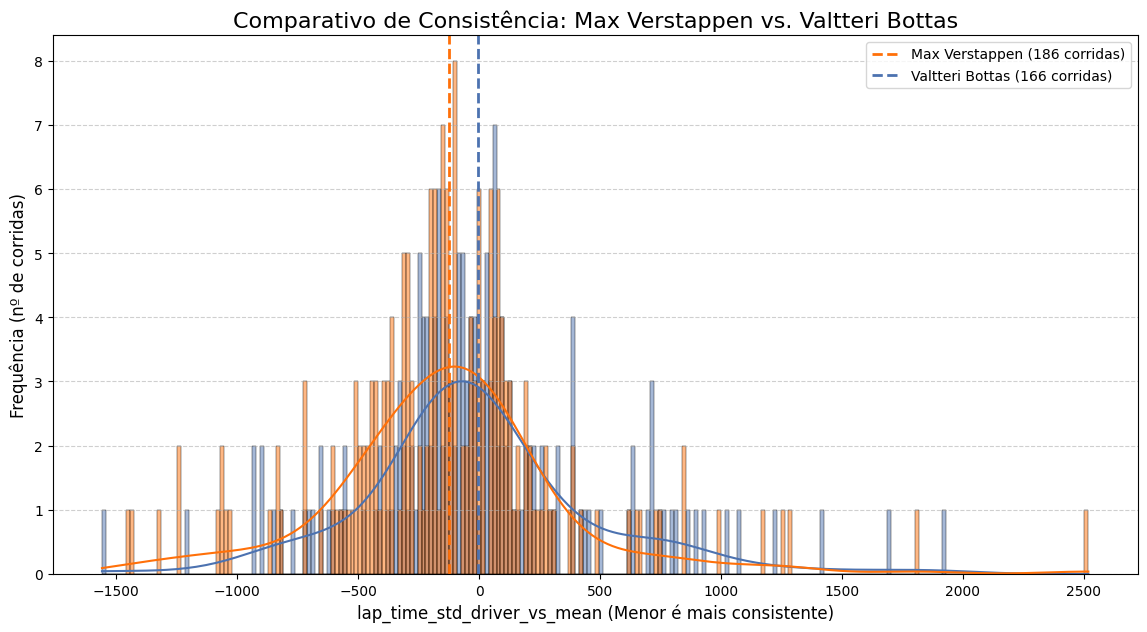

In [28]:
lista_pilotos_a_comparar = [
    # Campeões e Rivais Históricos da era moderna da F1
    'Lewis Hamilton',
    'Sebastian Vettel',
    'Fernando Alonso',
    'Nico Rosberg',
    'Kimi Räikkönen',
    
    # Companheiros de Equipe (atuais e passados)
    'Sergio Pérez',
    'Daniel Ricciardo',
    'Alexander Albon',
    'Pierre Gasly',
    'Carlos Sainz',
    'Yuki Tsunoda',
    
    # Nova Geração e Rivais Atuais
    'Charles Leclerc',
    'Lando Norris',
    'George Russell',
    'Oscar Piastri',
    'Valtteri Bottas'
]

fxns.comparar_consistencia_pilotos_hist(
    df_consistencia=df_lap_times_std,
    pilotos_a_comparar=lista_pilotos_a_comparar,
    metrica='lap_time_std_driver_vs_mean',
    bins=250
)


Bom, eu acredito que cheguei em alguma análise com um bom critério, porque os resultados nas comparações acima foram "consistentes" (risos):

- O Verstappen parece possuir uma consistência fora do normal, olhando cada gráfico acima, a média de seu desvio padrão relativo é menor do que todos os outros pilotos que estamos trazendo na comparação.
- Um piloto que chega bem perto (tendo uma quantidade muito alta de corridas também, o que é mais um reforço em termos de consistência) é ninguém mais, ninguém menos que Lewis Hamilton (que surpresa)...
- Interessante ver George Russel com altíssima consistência;

Para tentar simplificar essa visão de comparação de médias, podemos ir direto nisso também:



In [29]:
df_lap_times_std_agrup = df_lap_times_std[
    # Quero só trazer uma era mais "moderna", por exemplo, não vejo sentido em comparar com Senna, por n motivos
    (df_lap_times_std['year']>2010) &\
    (df_lap_times_std['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen', 'Lance Stroll', 'Yuki Tsunoda']))
    ].groupby( 
    by=[
        'driver_full_name',
    ]
).agg(
    {
        'lap_time_std_driver_vs_mean':'mean'
    }
).reset_index()

C:\Users\jvsen\AppData\Local\Temp\ipykernel_39876\637851152.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lap_time_std_driver_vs_mean', y='driver_full_name', data=df_lap_times_std_agrup, palette=palette, ax=ax)


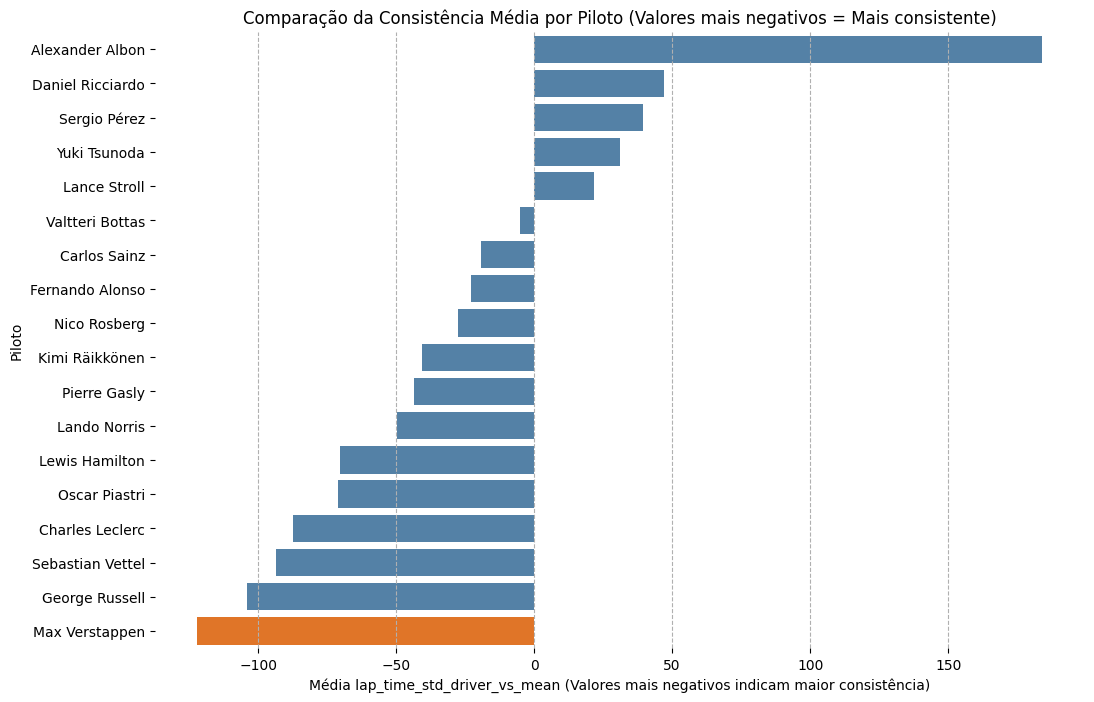

In [30]:
# Define a cor laranja para o Verstappen
cor_verstappen = "#FF7009"

# Cria a paleta de cores.  Outros pilotos serão azuis.
palette = {piloto: cor_verstappen if piloto == 'Max Verstappen' else 'steelblue' for piloto in df_lap_times_std_agrup['driver_full_name']}

# Ordena o DataFrame para que o piloto mais consistente apareça no topo
df_lap_times_std_agrup = df_lap_times_std_agrup.sort_values('lap_time_std_driver_vs_mean', ascending=False)

# Cria o gráfico
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='lap_time_std_driver_vs_mean', y='driver_full_name', data=df_lap_times_std_agrup, palette=palette, ax=ax)

# Adiciona rótulos e título
ax.set_xlabel('Média lap_time_std_driver_vs_mean (Valores mais negativos indicam maior consistência)')
ax.set_ylabel('Piloto')
ax.set_title('Comparação da Consistência Média por Piloto (Valores mais negativos = Mais consistente)')

# Adiciona grid para facilitar a leitura
ax.grid(axis='x', linestyle='--')

# Remove as bordas do gráfico
sns.despine(left=True, bottom=True)

# Mostra o gráfico
plt.show()

Max Verstappen se apresenta como o piloto mais consistente da análise:

- Seguido de George Russel, o que é bem interessante;
- Vemos outros grandes nomes da F1, muitos que já foram campeões, todos se apresentando como mais consistentes do que a média.
- Depois, podemos ver alguns outros nomes que se apresentam menos consistentes do que a média. 

*Obs: Coitado do Alexander Albon, no caso dele, eu diria que as equipes das quais fez parte possuem forte influência nisso, eu o considero um bom piloto*

## Comparação com Companheiro de Equipe (Head 2 Head):

Como mencionei no começo do documento, pensei em duas formas de analisar a capacidade individual do piloto, tentando isolar a influência de sua equipe.

A primeira foi a análise de consistência que apresentei acima, tomando como métrica de "qualidade" para o piloto, a sua consistência de tempo de volta.

A segunda forma vai ser a que eu vou tentar trazer agora, comparando a performance:

### Vou separar a análise em 3 partes:

- Resultados e pontuação de campeonato;
- Resultados de qualificação e tempos de voltas;
- Resultados de corridas e tempo das melhores voltas;

Vou detalhando abaixo conforme for avançando com a análise...

### Head 2 Head no Campeonato:

Como as quantidades de corridas etc vão variando ao longo dos anos, se torna um tanto difícil de eu comparar pontuações historicamente entre diferentes pilotos pois o campeonato foi evoluindo em termos de estrutura ao longo dos anos. Portanto, pra não mergulhar em uma seara muito específica, essa análise de campeonato vai ser um pouco mais breve, porque eu acho que as descobertas aqui são mais suscetíveis a discussões que podem levar a uma imensidão de considerações e desconsiderações a serem feitas.

In [31]:
df_championship = f1_db.run_query_file("data/db_queries/drivers_standings.sql").drop_duplicates()
df_championship

,round_id,year,race_name,driver_id,driver_ref,driver_number,driver_code,driver_forename,driver_surname,driver_full_name,points,position,wins
0,1143.0,2025,Singapore Grand Prix,857,piastri,81.0,PIA,Oscar,Piastri,Oscar Piastri,336.0,1.0,7
1,1143.0,2025,Singapore Grand Prix,845,norris,4.0,NOR,Lando,Norris,Lando Norris,314.0,2.0,5
2,1143.0,2025,Singapore Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,273.0,3.0,4
3,1143.0,2025,Singapore Grand Prix,847,russell,63.0,RUS,George,Russell,George Russell,237.0,4.0,2
4,1143.0,2025,Singapore Grand Prix,843,leclerc,16.0,LEC,Charles,Leclerc,Charles Leclerc,173.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,1.0,1950,British Grand Prix,1,farina,NaN,None,Nino,Farina,Nino Farina,9.0,1.0,1
35080,1.0,1950,British Grand Prix,2,fagioli,NaN,None,Luigi,Fagioli,Luigi Fagioli,6.0,2.0,0
35081,1.0,1950,British Grand Prix,3,reg_parnell,NaN,None,Reg,Parnell,Reg Parnell,4.0,3.0,0
35082,1.0,1950,British Grand Prix,4,cabantous,NaN,None,Yves,Cabantous,Yves Cabantous,3.0,4.0,0


In [32]:
# Nesse dataset, provavelmente vou acabar usando apenas a última etapa do campeonato, pra ver a posição no final
# Então, o que eu posso fazer é criar uma flag pra identificar isso

df_championship['last_round_id'] = df_championship.groupby(['year'])['round_id'].transform('max')

df_championship['last_round_of_year_flag'] = df_championship['round_id'] == df_championship['last_round_id']

df_championship = df_championship.drop(columns=['last_round_id'])

In [33]:
# Podemos olhar aqui rapidamente, o histórico de Verstappen ao final dos campeonatos:

df_championship_ver = df_championship[(df_championship['last_round_of_year_flag']) & (df_championship['driver_ref']=='max_verstappen')]

# Vou adicionar a equipe dele, só pra contribuir pra análise:
df_championship_ver = pd.merge(
    left=df_championship_ver,
    right=df_races[['round_id', 'driver_ref', 'constructor_name']],
    on=['driver_ref', 'round_id']
)

df_championship_ver

,round_id,year,race_name,driver_id,driver_ref,driver_number,driver_code,driver_forename,driver_surname,driver_full_name,points,position,wins,last_round_of_year_flag,constructor_name
0,1143.0,2025,Singapore Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,273.0,3.0,4,True,Red Bull
1,1125.0,2024,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,437.0,1.0,9,True,Red Bull
2,1101.0,2023,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,575.0,1.0,19,True,Red Bull
3,1079.0,2022,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,454.0,1.0,15,True,Red Bull
4,1057.0,2021,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,395.5,1.0,10,True,Red Bull
5,1035.0,2020,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,214.0,3.0,2,True,Red Bull
6,1018.0,2019,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,278.0,3.0,3,True,Red Bull
7,997.0,2018,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,249.0,4.0,2,True,Red Bull
8,976.0,2017,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,168.0,6.0,2,True,Red Bull
9,956.0,2016,Abu Dhabi Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,204.0,5.0,1,True,Red Bull


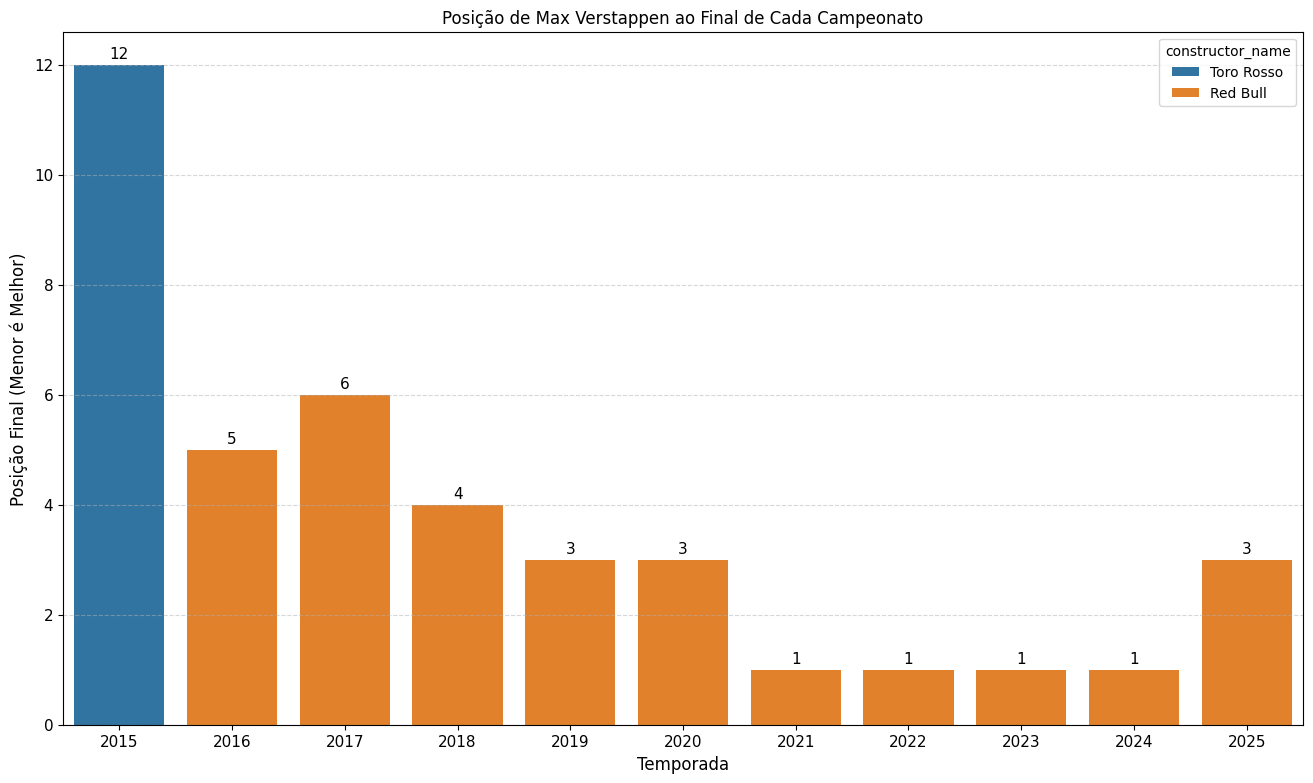

In [34]:
fig, ax = plt.subplots(figsize=(16, 9))

# Grade de fundo (leve, só no eixo Y)
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

sns.barplot(
    data=df_championship_ver,
    x='year',
    y='position',
    ax=ax,
    hue='constructor_name'
)

# Adicionar os valores (posições) em cima das barras
for p in ax.patches[0:-2]: # Tive que fazer esse indexing pq tem um 0 aleatório que fica aparecendo no gráfico (?)
    ax.annotate(
        f'{p.get_height():.0f}',        # O valor (posição, ex: "1")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center', va='center',       # Centralizado na barra
        xytext=(0, 8),                  # Offset de 8 pontos para cima
        textcoords='offset points',
        fontsize=11,
    )

ax.set_title(
    "Posição de Max Verstappen ao Final de Cada Campeonato",
)

# Labels mais claros
ax.set_xlabel("Temporada", fontsize=12)
ax.set_ylabel("Posição Final (Menor é Melhor)", fontsize=12)

# Ajuste de ticks
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)


Acima, podemos ver o histórico de desempenho do Verstappen ao final de cada temporada.

In [35]:
df_championship_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_championship[df_championship['last_round_of_year_flag']],
    metricas=['position', 'wins', 'points'],
    df_lookup=df_races
)

In [36]:
# Podemos agora tratar um pouco esse dataset pra ter insights:

df_championship_vs_filtrado = df_championship_vs[df_championship_vs['driver_full_name'].isin(['Max Verstappen'] + lista_pilotos_a_comparar)]

df_championship_vs_agrup = df_championship_vs_filtrado.groupby(
    by=['driver_ref', 'driver_full_name']
).agg(
    {
        'position_diff_tmate':'mean',
        'wins_diff_tmate':'mean',
        'points_diff_tmate':'mean'
    }
).reset_index()

# A coluna de position_diff é negativa quando o piloto fica a frente, só pro gráfico ficar mais intuitivo depois, eu vou inverter o sinal
df_championship_vs_agrup['position_diff_tmate'] = df_championship_vs_agrup['position_diff_tmate']*(-1)

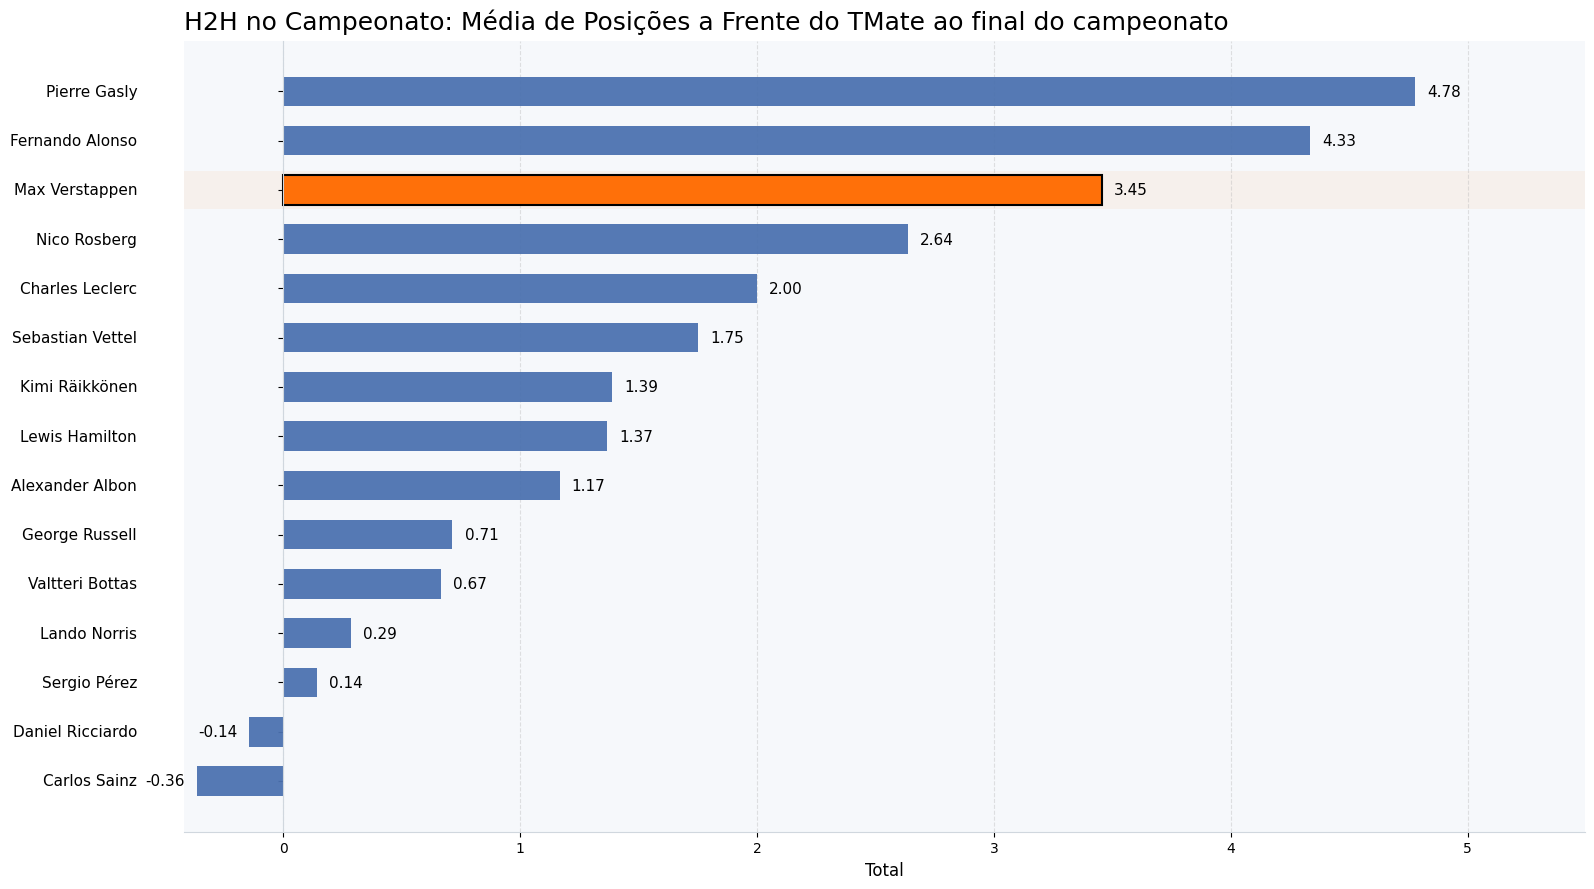

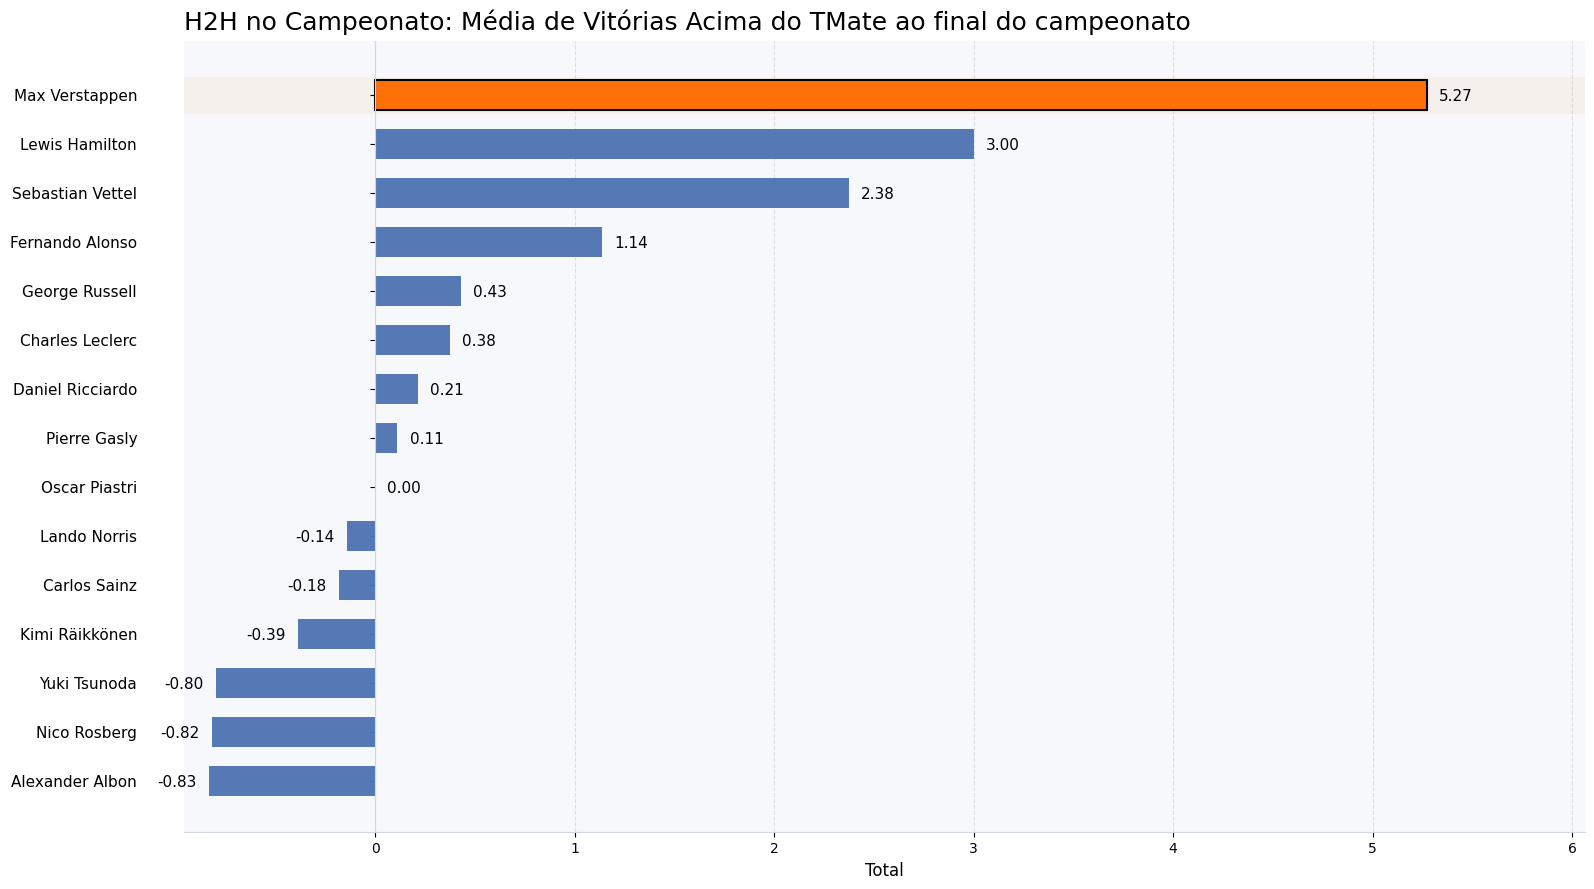

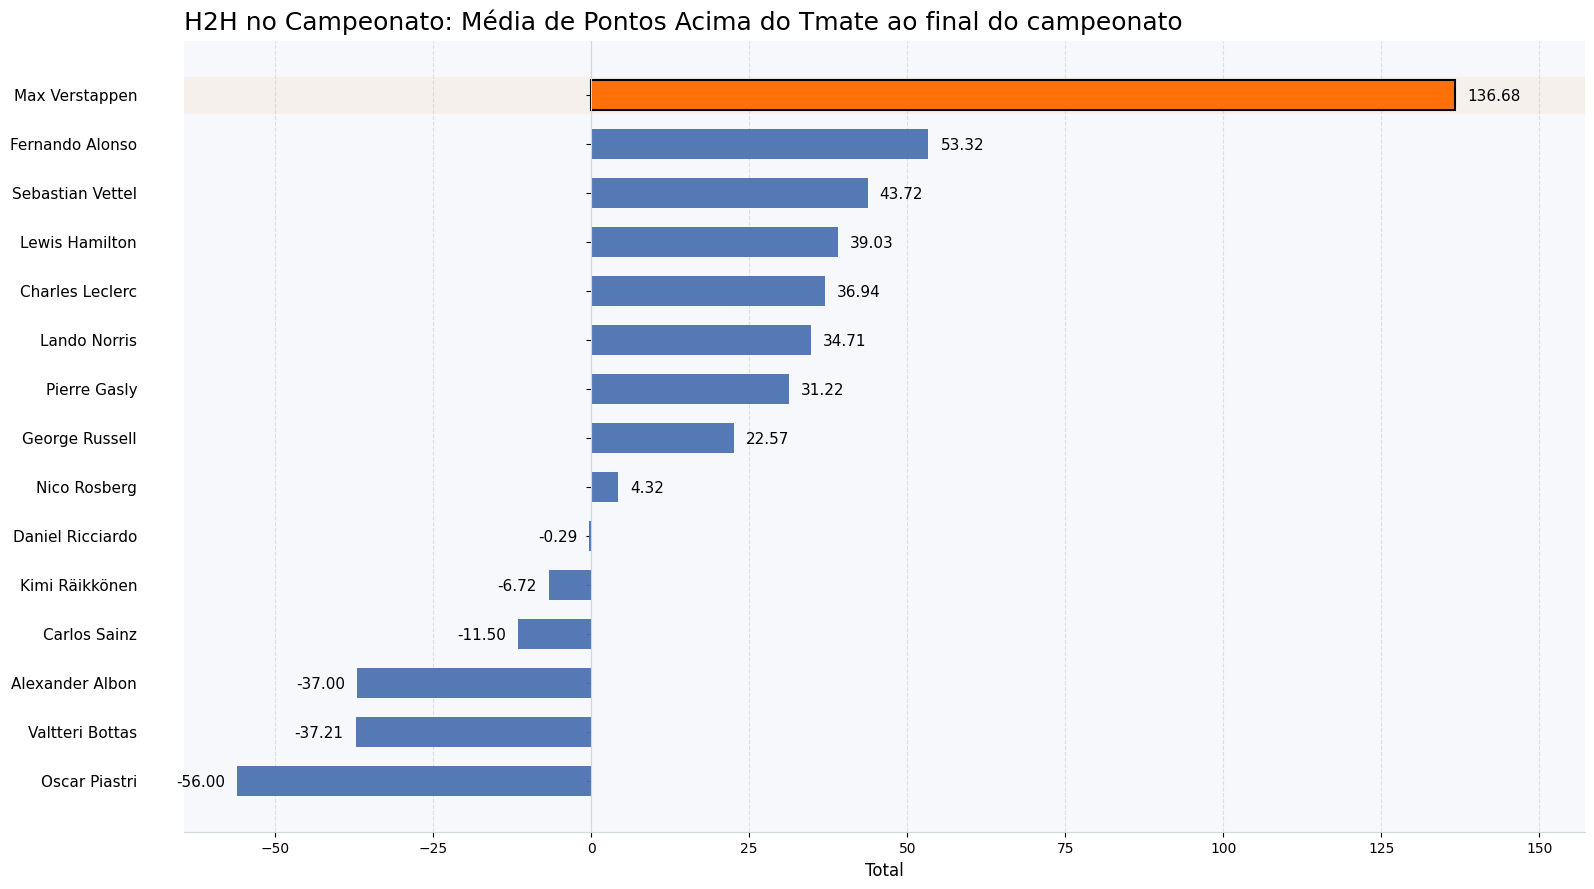

In [37]:
dict_cols_plot = {
    'position_diff_tmate':'Média de Posições a Frente do TMate',
    'wins_diff_tmate':'Média de Vitórias Acima do TMate',
    'points_diff_tmate':'Média de Pontos Acima do Tmate'
}

for col_valor, traducao in dict_cols_plot.items():

    fxns.graf_top_pilotos(
        df=df_championship_vs_agrup,
        col_valor=col_valor,
        titulo=f'H2H no Campeonato: {traducao} ao final do campeonato',
        top_n=15,
        valor_format_str="{:,.2f}",
        figsize=(16,9)
    )

Acima nós podemos ver, respectivamente:

- **Média de quantas posições o piloto estava a frente de seu companheiro de equipe**, ou seja, podemos interpretar, que em média, o Gasly fica quase 5 posições acima de seu companheiro de equipe ao final do campeonato (piloto underrated?)
    - Nesse gráfico, podemos ver que o Verstappen aparece em terceiro lugar, e isso por si só é muito bom. Mas tem uma consideração aqui, eu diria que o 3.45 do VER é "diferente" que o 4.33 do ALO por mais do que pareça óbvio o que estou dizendo, e digo isso porque o Verstappen vem dominando muitos campeonatos historicamente, sendo que o VER, depois de seu primeiro campeonato na F1, que terminou em 12o, as suas piores posições ao final de um campeonato foi de um 6o e um 4o, fora isso ele ficou entre os 3 primeiros em todos os outros campeonatos. Já o Alonso, até por ter disputado muito mais campeonatos e participar de equipes que não estão sempre à frente, existe muito mais trocas de posição e "sensibilidade" aos pontos do que nas primeiras posições (Verstappen está no hardcap enquanto Alonso tem mais posições pra subir frente ao seu companheiro), mas isso, de forma alguma, deixa de mostrar o quão grande piloto o Alonso é, eu só acho que essa análise é um tanto enviesada por ele ter pilotado em equipes que ficam mais atrás no campeonato do que Verstappen (vou deixar de lado que o companheiro de equipe nos últimos anos de Alonso tenha sido o Stroll). Uma linha de raciocínio, na minha visão, também contribui pro valor elevado do Gasly, de novo, de forma que isso não invalida que ele é um bom piloto.

- **Média de vitórias a mais que o companheiro de equipe ao final do campeonato**, ou seja, interpretamos que o Verstappen ganha, em média, 5.3 corridas a mais que o seu companheiro de equipe ao final do campeonato.
    - Isso é muito interessante, e acho que é uma das características mais marcantes dos campeonatos do Verstappen historicamente, ele costuma despontar muito de seu companheiro de equipe, e isso é traduzido aqui, ele é, em média, o piloto que tem a maior quantidade de vitórias a mais que seu companheiro de equipe quando o ano termina.

- **Média de Pontos acima do companheiro de equipe ao final do campeonato**, ou seja, interpretamos, que, em média, Verstappen termina o campeonato 136 pontos acima de seu companheiro de equipe, o que é meio bizarro, e foi muito elevado nos últimos anos com o Perez que não estava conseguindo performar, mas também por outros pilotos em que isso aconteceu (sim, existe um padrão aqui e meu objetivo não vai ser tentar analisar isso especificamente, podemos passar muitas horas discutindo pq os companheiros de equipe do Verstappen não performam bem, mas eu já mencionei no início que tenho a premissa que os carros entre companheiros de equipe tem o mesmo potencial de performance, pra não correr o risco de entrar em uma tangente absurda).


O que consigo extrair da análise acima, é que, resumidamente, o Verstappen costuma se "descolar" mais de seu companheiro de equipe ao longo do campeonato do que outros pilotos, levando a tese de que é um piloto que consegue extrair mais do carro do que outros pilotos conseguiriam.

## H2H na Qualificação

Mencionei acima que uma outra forma de abordarmos a comparação com o companheiro de equipe seria através do resultado de qualificação, então vamos lá e, como sempre, vou explicando ao longo da análise:

#### Percentual de "vitórias" em qualificação

Uma primeira, e simples abordagem, é ver o percentual de vitórias contra o companheiro de equipe em qualificação. A ideia é que quanto maior o percentual de vitória, "melhor" é o piloto, dado que ele performou melhor contra alguém que estava com o mesmo "equipamento" que ele.

Obs.: eu uso o termo "vitória" de forma mais genérica aqui, a ideia é ver quem qualificou na frente, é isso que eu to considerando como "vitória", não de fato ter ganhado a corrida.  

In [38]:
df_quali = f1_db.run_query_file("data/db_queries/qualify_report.sql")
df_quali = fxns.add_lap_time_ms_column(df_quali, lap_time_col='best_lap_time')

In [39]:
# Pra não correr o risco de analisar pilotos que possam ter participado de pouquíssimas corridas, vou removê-los da análise:

# Adiciono uma coluna contando de quantos eventos o piloto participou
df_quali['event_count'] = df_quali.groupby(['driver_ref', 'session_type'])['race_name'].transform('count')
# ^^ Aqui eu posso fazer o groupby dessa forma pq todo piloto necessariamente passou pelo Q1, então contar pelo session_type aqui funciona

# Filtro só quem participou de mais do que 20 eventos, isolando pilotos das antigas que participaram de poucas etapas

df_quali = df_quali[df_quali['event_count']>20]

In [40]:
# Quero filtrar apenas a última sessão em que cada piloto chegou (tem gente que só vai pro Q1 etc)
# Não vou analisar sessão por sessão, ou seja, não quero Q1 vs Q1 etc, quero só até onde cada piloto chegou e vou ver a performance na quali como um todo

df_quali_valid = fxns.get_final_quali_session(df_quali)

In [41]:
# Agora vou trazer as informações sobre o companheiro de equipe pra comparar as métricas:

df_quali_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_quali_valid,
    metricas=['best_lap_time_ms', 'final_quali_position'],
    colunas_id_tmate=['driver_ref', 'driver_full_name', 'session_type'] # Vou trazer até qual sessão o companheiro chegou, vai ser útil pra depois, confia
)

In [42]:
# Vou colocar uma flag indicando se o piloto "ganhou" do tmate dele naquele evento de qualificação

df_quali_vs['fl_win_quali_vs_tmate'] = df_quali_vs['final_quali_position'] < df_quali_vs['final_quali_position_tmate']

In [43]:
# Agora posso agrupar o dataset pra contar quantidade de "vitórias" em quali para cada piloto

df_quali_vs_agrup = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'fl_win_quali_vs_tmate'
    ]
).agg(
    {'round_id':'count'}
).reset_index(
).rename(
    columns={
        'round_id':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total:
df_quali_vs_agrup['total_rounds_for_driver'] = df_quali_vs_agrup.groupby(['driver_ref'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_quali_vs_agrup['result_percentage'] = df_quali_vs_agrup['qt_rounds'] / df_quali_vs_agrup['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_quali_vs_agrup_wins = df_quali_vs_agrup[df_quali_vs_agrup['fl_win_quali_vs_tmate']]


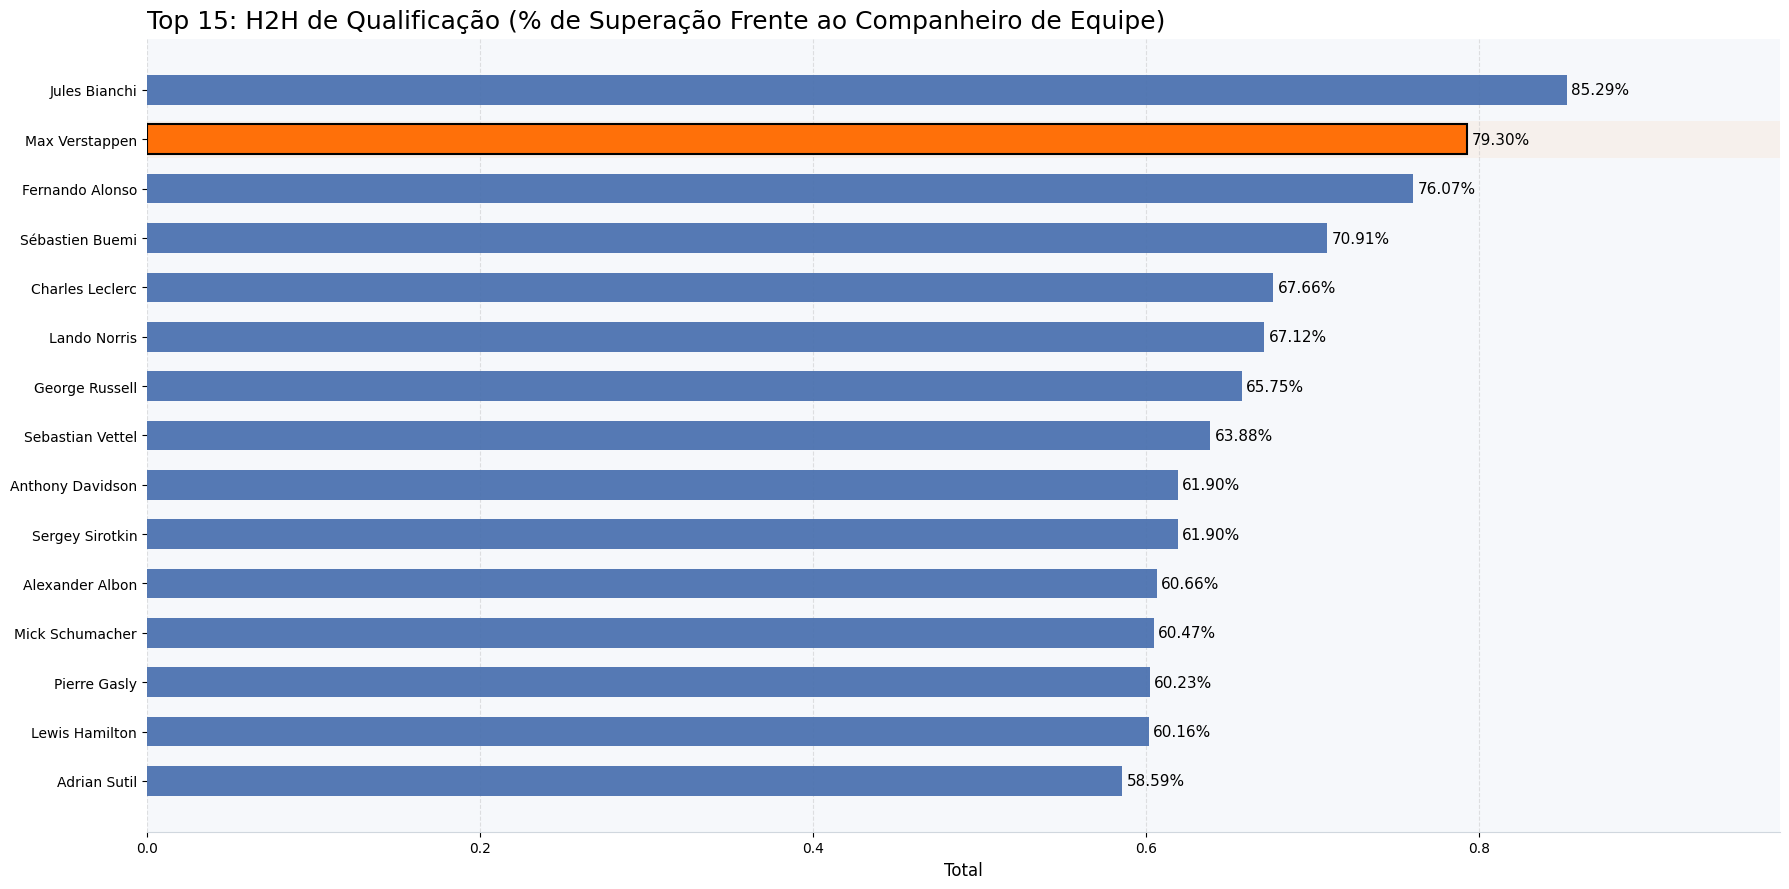

In [44]:
fxns.graf_top_pilotos(
    df=df_quali_vs_agrup_wins,
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15: H2H de Qualificação (% de Superação Frente ao Companheiro de Equipe)'
)

Acima, temos os top 15 pilotos com o maior percentual de superação frente ao companheiro de equipe em qualificação. Entenda da seguinte forma: Jules Bianchi qualificou na frente de seu companheiro de equipe em 85,29% das vezes.

Novamente, vemos o Verstappen aparecendo logo depois de Jules Bianchi, e uma observação sobre isso à quem não sabe:
- Jules Bianchi foi um piloto promissor que teve sua carreira interrompida por um trágico acidente no GP de Suzuka de 2014. Ele começou sua carreira na F1 em 2013 e no seu segundo ano da F1 sofreu esse acidente. Sua morte foi a primeira fatalidade decorrente de um acidente na F1 desde Ayrton Senna em 1994 e levou a diversas mudanças nas medidas de segurança nos eventos da F1.
- **Sobre sua breve carreira**: Ele particiou de 34 GPs da F1, todos pela Marussia e correu contra apenas 1 companheiro de equipe, que superou em quase todos eventos de qualificação que participaram. Infelizmente, considero que ele não teve oportunidade de apresentar todo seu potencial na F1. O número apresentado no gráfico acima é uma prova de que era um piloto de qualidade. Mas, o fato é, por ter tido sua carreira tragicamente interrompida, consequentemente não podendo ter alcançado números de GP como de Hamilton, Alonso, Verstappen etc e ter tido apenas um companheiro de equipe durante sua carreira na F1. Veja esse percentual como um número que atesta a sua qualidade como piloto, mas não como uma métrica diretamente comparável ao de outros pilotos que trago no gráfico acima.
- **Novamente Verstappen aparece com números completamente dominadores**: Dentre todos os pilotos da era moderna, e que participaram de uma grande quantidade de GPs, o Verstappen aparece simplesmente superando todos eles. Seguido de Alonso, que tem um percentual muito surpreendente também.

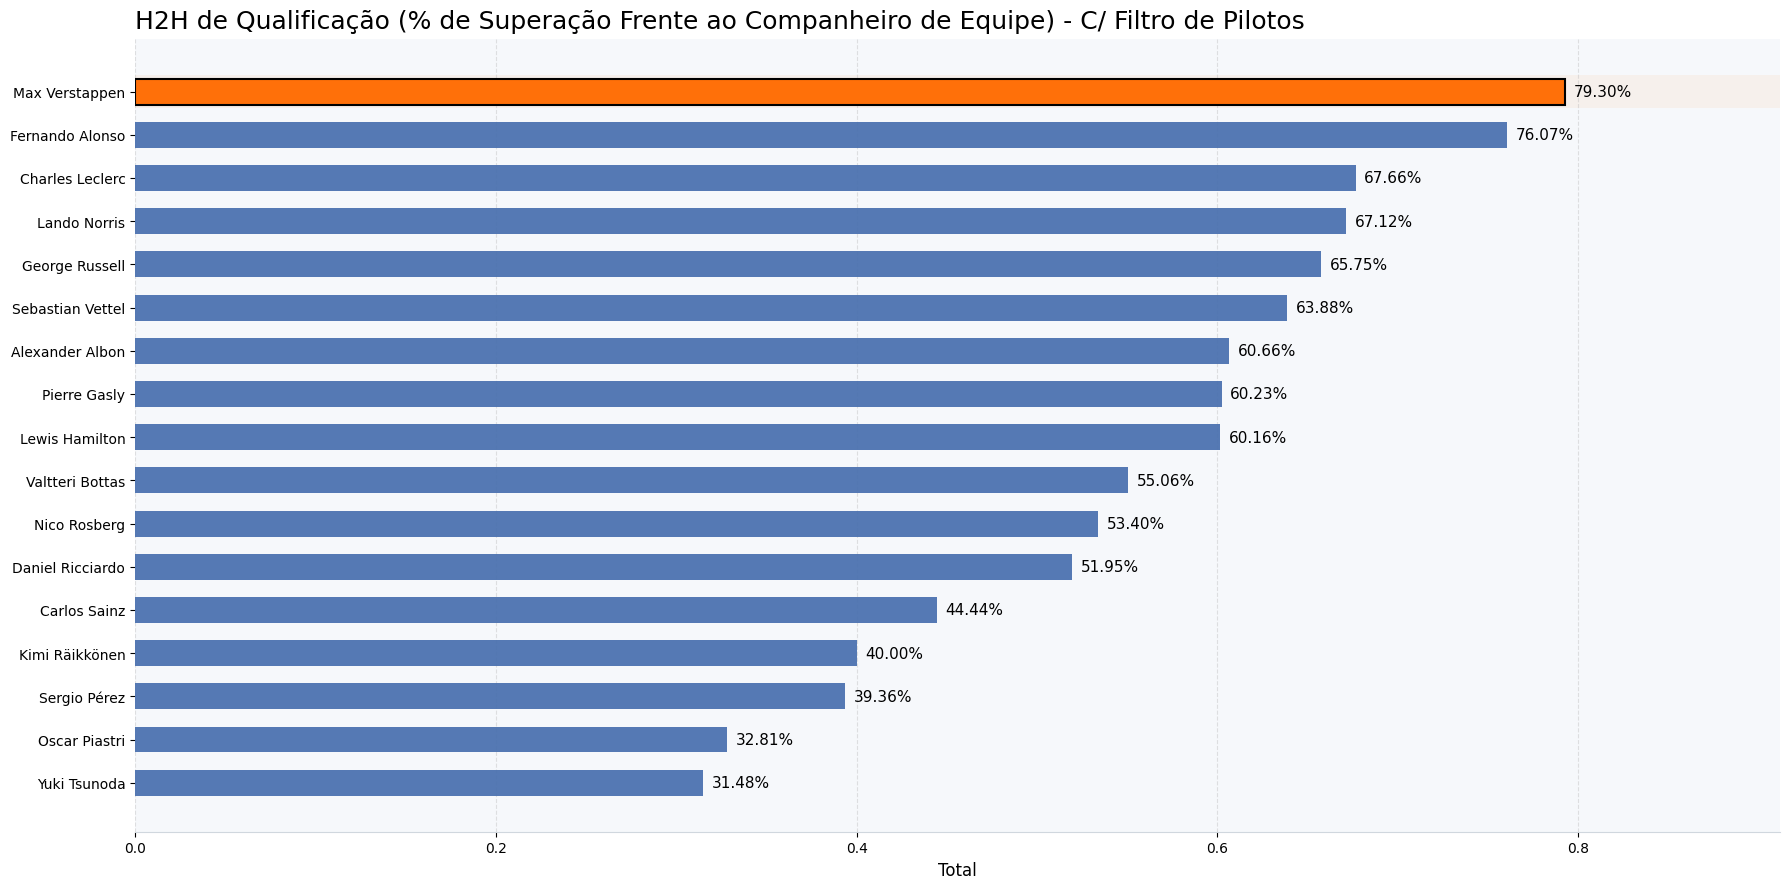

In [45]:
# Se pegarmos só os pilotos mais "Comparáveis":

fxns.graf_top_pilotos(
    df=df_quali_vs_agrup_wins[df_quali_vs_agrup_wins['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=30,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='H2H de Qualificação (% de Superação Frente ao Companheiro de Equipe) - C/ Filtro de Pilotos'
)

Ao utilizarmos a lista que eu tinha criado acima, usando grandes nomes de uma era mais moderna da F1, vemos que o Verstappen simplesmente supera todos eles.

E vale mencionar também o quão grande piloto o Alonso é, está na F1 há um século já, participou de diversas equipes, teve diversos companheiros de equipe e tem uma taxa de superação absurdamente alta (o fato de o companheiro atual ser o Stroll pode ter ajudado um pouco...)

Podemos também ver como Verstappen foi contra cada companheiro de equipe que teve, será que algum foi capaz de superá-lo?

In [46]:
# Agora posso agrupar o dataset pra contar quantidade de "vitórias" em quali para cada piloto

df_quali_vs_agrup_tmate = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate',
        'fl_win_quali_vs_tmate'
    ]
).agg(
    {'round_id':'count'}
).reset_index(
).rename(
    columns={
        'round_id':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve com aquele compnaheiro de equipe:
df_quali_vs_agrup_tmate['total_rounds_for_driver_w_tmate'] = df_quali_vs_agrup_tmate.groupby(['driver_ref', 'driver_full_name_tmate'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_quali_vs_agrup_tmate['result_percentage'] = df_quali_vs_agrup_tmate['qt_rounds'] / df_quali_vs_agrup_tmate['total_rounds_for_driver_w_tmate']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_quali_vs_agrup_tmate_wins = df_quali_vs_agrup_tmate[df_quali_vs_agrup_tmate['fl_win_quali_vs_tmate']]

Text(0.5, 1.0, 'H2H Qualificação: % de Superação de VER contra seus TMates')

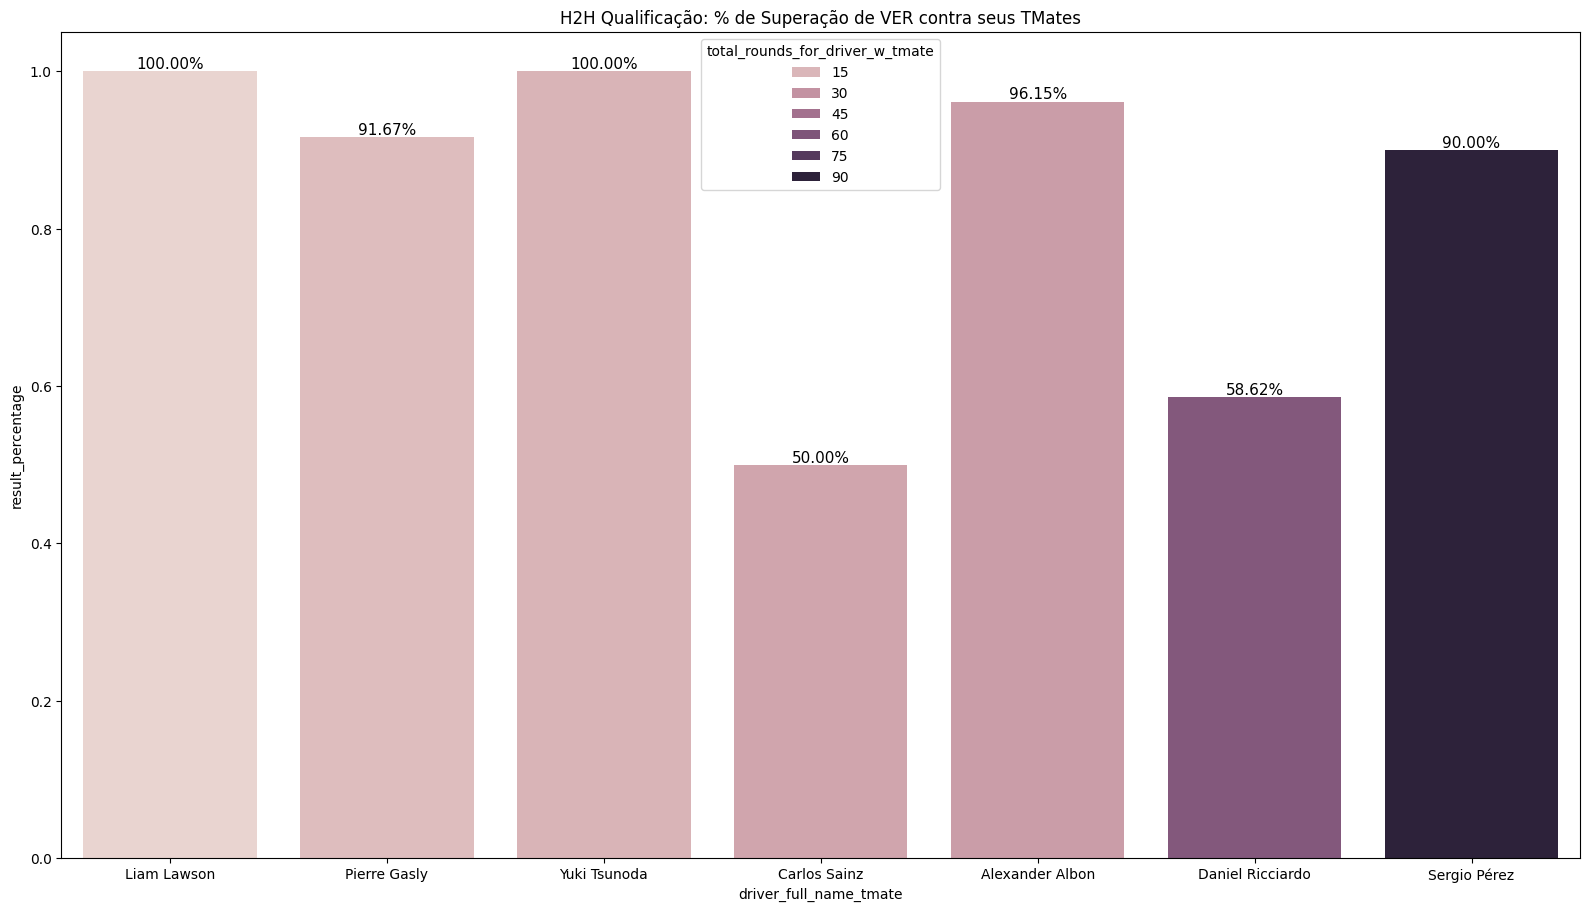

In [47]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_quali_vs_agrup_tmate_wins[df_quali_vs_agrup_tmate_wins['driver_full_name']=='Max Verstappen'].sort_values('total_rounds_for_driver_w_tmate'),
    x='driver_full_name_tmate',
    y='result_percentage',
    hue='total_rounds_for_driver_w_tmate'
)

for p in ax.patches[:-6]:
    ax.annotate(
        f'{p.get_height():.2%}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

plt.tight_layout()

ax.set_title('H2H Qualificação: % de Superação de VER contra seus TMates')

Acima, podemos ver que Verstappen superou todos os companheiros de equipe com exceção de Carlos Sainz, contra quem empatou em performance de qualificação!

Isso foi na Toro Rosso, na temporada de estreia de ambos os pilotos!

Obs.: Existem diversas fontes que apontam que Verstappen superou Sainz em qualificação durante seu tempo juntos na Toro Rosso, por um evento de qualificação que seria o da Russia em 2015, mas a questão é que Sainz não participou dessa quali, por ter sofrido um acidente no TL3, que fez com que seu carro ficasse destruído e que Sainz precisasse de assistência média. Em relação a isso, sei que tem quem vai falar que isso é culpa de Sainz, já que se ele não tivesse batido, teria participado da quali. Porém, eu só to colocando aqui eventos em que ambos os pilotos participaram, e, sendo assim, ambos bateram um ao outro exatamente 11 vezes.

### Mas, e se tentarmos quantificar o quanto um piloto está superando o outro?

Meu próximo ângulo dessa análise será de ver em quanto cada piloto supera o seu companheiro de equipe em qualificação:

In [48]:
# Após observar o dataset, notei que se um pilot tem alguma volta muito lenta, isso pode acabar atrapalhando a análise que vou fazer abaixo
# Sendo assim, vou tirar aberrações que seriam coisas "fora do normal" nessa comparação de tempos

# Sempre que a diferença for maior do que 2 segundos, eu vou remover a volta da comparação
# Acredito que 2 segundos é um gap temporal grande o suficiente para que só ocorra se um dos pilotos tiver algum problema
df_quali_vs = df_quali_vs[df_quali_vs['best_lap_time_ms_diff_tmate']>-2000]
df_quali_vs = df_quali_vs[df_quali_vs['best_lap_time_ms_diff_tmate']<2000]

# Uma outra coisa que pode acontecer são "situações adversas" durante a quali (principalmente chuva), que faz com que a pista fique mais lenta ao longo da quali
# Isso faz com que se eu considerar tempos de Qs diferentes, a comparação fica estranha (Acredite, eu tentei)
# Isso faz sentido também ao se considerar como a pista "evolui" entre as sessões, contribuindo pra eu comparar apenas sessões iguais
df_quali_vs = df_quali_vs[df_quali_vs['session_type']== df_quali_vs['session_type_tmate']]

In [49]:
df_quali_vs_time = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name'
    ]
).agg(
    {
        'best_lap_time_ms_diff_tmate' : 'mean'
    }
).reset_index()

# Vou inverter o sinal, pra ficar mais fácil de visualizar, dado que aqui, valores negativos são melhores
df_quali_vs_time['best_lap_time_ms_diff_tmate'] = df_quali_vs_time['best_lap_time_ms_diff_tmate']*-1

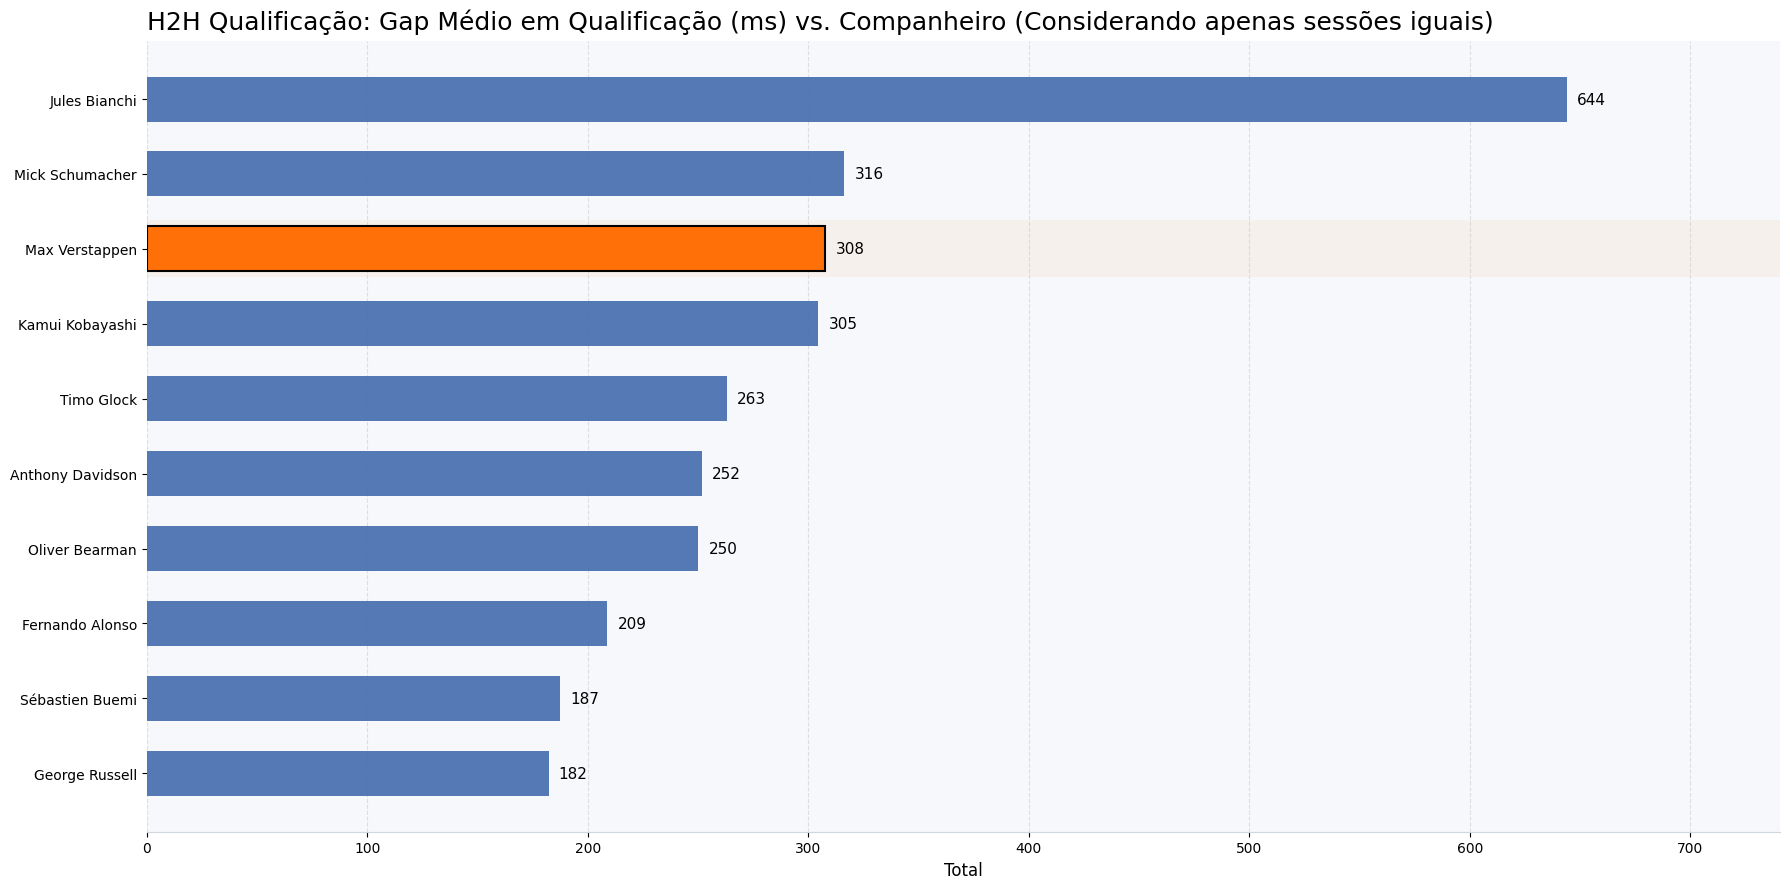

In [50]:
fxns.graf_top_pilotos(
    df=df_quali_vs_time,
    top_n=10,
    col_valor='best_lap_time_ms_diff_tmate',
    titulo='H2H Qualificação: Gap Médio em Qualificação (ms) vs. Companheiro (Considerando apenas sessões iguais)'
)

O gráfico acima é interessante, eu vejo nomes bem inesperados que aparecessem nessas análises e entendo isso da seguinte forma:
- Nomes como Jules Bianchi e Mick Schumacher tiveram temporadas muito dominantes contra seu companheiro de equipe em algum momento da carreira e não tiveram muitas outras performances além dessas, ou seja, tiveram temporadas específicas com companheiros que eram claramente mais "fracos", mas por si só não tiveram performances dominantes na F1;
- A maioria dos nomes são de pilotos que participaram de equipes do *mid field* pra trás, onde geralmente vemos maiores oscilações em termos de performance, e onde muitos pilotos que estão iniciando sua carreira estão fazendo parte;
- Também, nessas equipes, é mais comum que piltos terminem a qualificação em sessões diferentes (apenas 1 deles vai pro Q2 etc) e isso diminui o tamanho da amostra pra quando formos calcular a média, fazendo com que uma ou outra performance que seja mais dominante, apesar de não consistente, puxar a média pra cima.

Por esses e outros motivos, novamente, não acho que faça tanto sentido compararmos nomes como Mick Schumacher com Verstappen, Alonso, Russel etc porque tiveram trajetórias de carreira bem diferentes e que tiveram que performar contra diversos companheiros de equipe que realizaram conquistas na F1 por si só. Sendo assim, vou fazer o mesmo filtro que fiz antes em análises anteriores, selecionando só nomes específicos aqui pra análise.

E, novamente, com esses fatores que disse acima, eu não quis dizer que eu considero esses pilotos "piores" e portanto estou simplesmente removendo da análise por vontade própria pra criar alguma narrativa específica, mas eu acho que estamos falando de pilotos com trajtetórias de carreira na F1 muito diferentes e por conta disso acredito que a análise acabe perdendo um pouco de sentido.

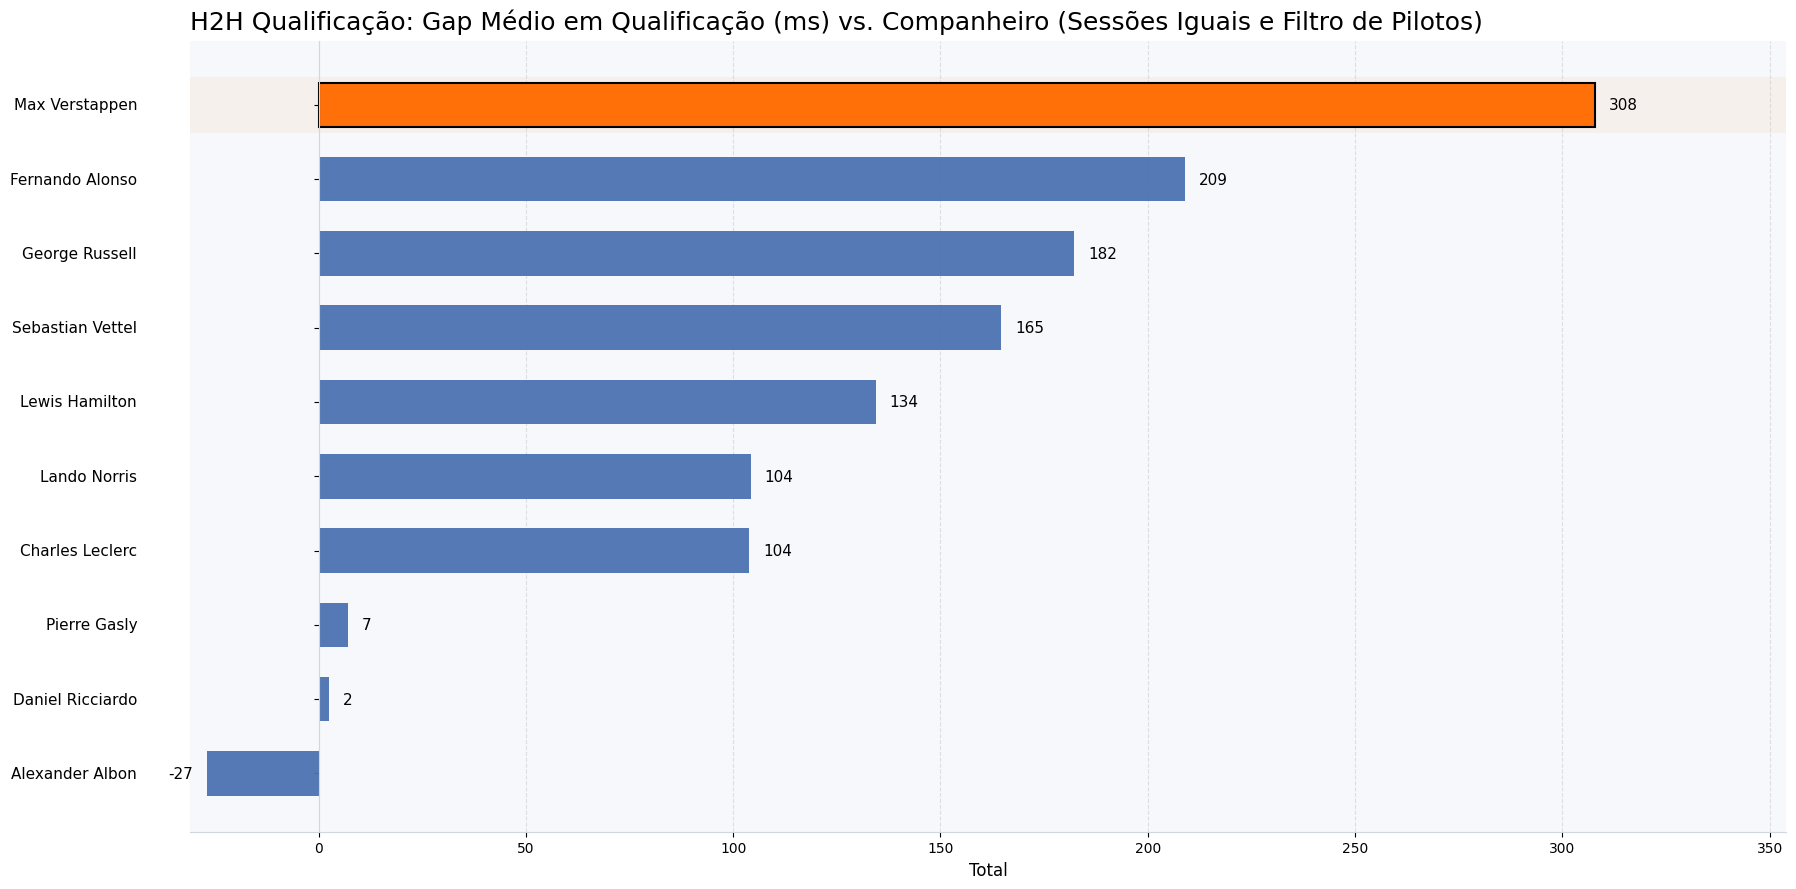

In [51]:
fxns.graf_top_pilotos(
    df=df_quali_vs_time[df_quali_vs_time['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=10,
    col_valor='best_lap_time_ms_diff_tmate',
    titulo='H2H Qualificação: Gap Médio em Qualificação (ms) vs. Companheiro (Sessões Iguais e Filtro de Pilotos)'
)

Parece brincadeira, mas realmente parece que o Verstappen, novamente, possui maior média de superação de seu companheiro de equipe em qualificação (considerando apenas quando foram para a mesma sessão).

Podemos ver isso por companheiro de equipe do VER, tentando identificar até se teve algum que superou ele. Farei isso abaixo.

In [52]:
df_quali_vs_time_tmate = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate'
    ]
).agg(
    {
        'best_lap_time_ms_diff_tmate' : 'mean',
        'round_id':'count' # Vou extrair também quantos eventos fizeram juntos
    }
).reset_index().rename(
    columns={
        'round_id':'round_count'
    }
)

# Vou inverter o sinal, pra ficar mais fácil de visualizar, dado que aqui, valores negativos são melhores
df_quali_vs_time_tmate['best_lap_time_ms_diff_tmate'] = df_quali_vs_time_tmate['best_lap_time_ms_diff_tmate']*-1

Text(0.5, 1.0, 'H2H Qualificação: Gap Médio de Qualificação Por Companheiro de Equipe')

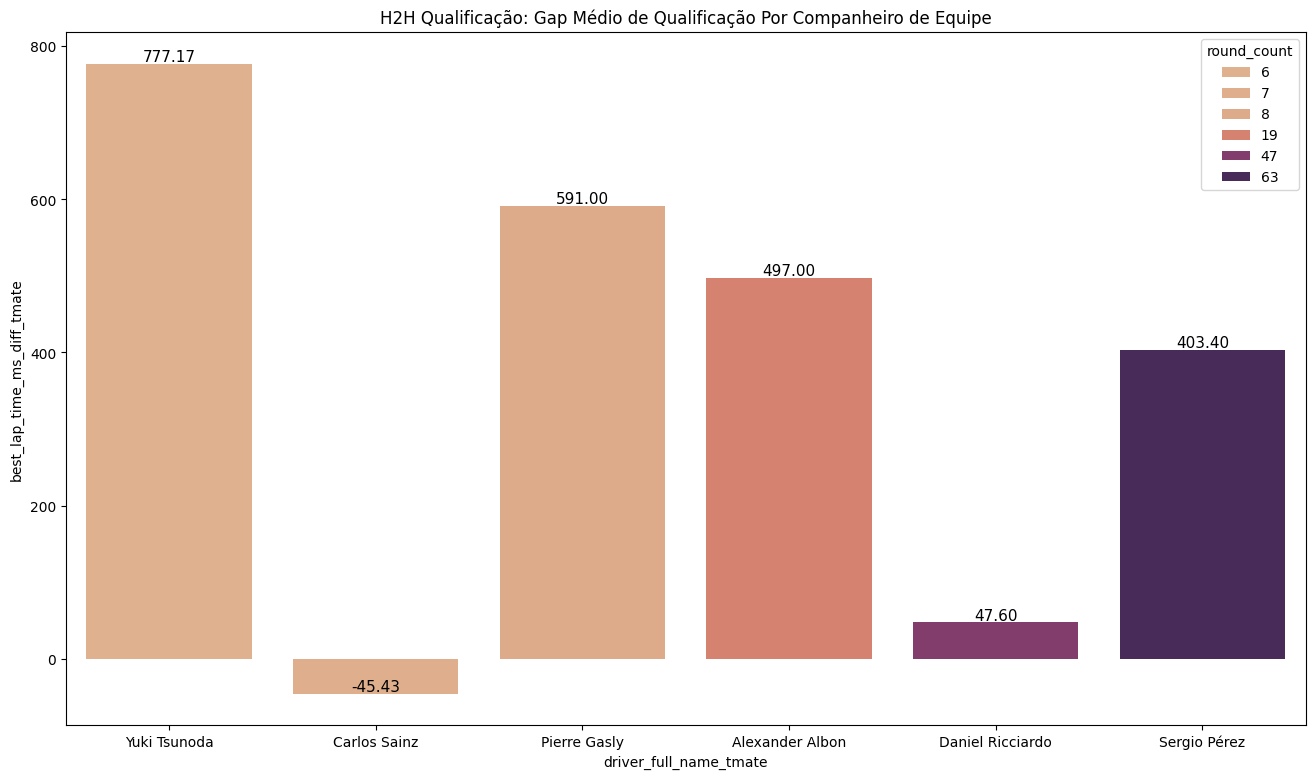

In [53]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_quali_vs_time_tmate[df_quali_vs_time_tmate['driver_full_name']=='Max Verstappen'].sort_values('round_count'),
    x='driver_full_name_tmate',
    y='best_lap_time_ms_diff_tmate',
    hue='round_count',
    palette='flare'
)

for p in ax.patches[:-6]:
    ax.annotate(
        f'{p.get_height():,.2f}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

ax.set_title('H2H Qualificação: Gap Médio de Qualificação Por Companheiro de Equipe')

Acima podemos ver um gráfico que mostra, por companheiro de equipe, qual foi o gap médio entre eles. Para Verstappen: superou todos os seus companheiros de equipe com a exceção de sua primeira temporada na F1, em que foi levemente superado por Sainz, apesar de terem empatado em termos de resultado na quali, quando ambos terminaram na mesma sessão (ambos foram pro Q3, por exemplo, que infelizmente não foram muitos casos com apenas 7), podemos ver que Sainz levou uma pequena vantagem frente ao Verstappen.

Fora o Sainz, VER superou todos os outros em termos de tempo (o Ricciardo por muito pouco), quando terminaram na mesma sessão. E por conta desse filtro também que o Lawson não aparece na lista, na sua breve participação na RBR, ele não chegou a conseguir terminar nenhuma quali no Q3, por isso, não aparece no gráfico.

### H2H em Corridas:

Agora, pra finalmente fechar a parte de análises, antes de partir pra conclusão, vou dar uma olhada no dataset de corridas. Mas acho que algumas conclusões que eu vou apresentar aqui vão ser meio óbvias dado o andamento da análise até o momento, então vou tentar passar mais rapidamente e ir para um ponto que pode ser mais interessante. Vou explicando abaixo conforme for andando com a análise.

#### Resultados de corridas:

In [54]:
# Vou trabalhar momentaneamente com o dataset de corridas:

df_races = fxns.add_lap_time_ms_column(df_races, 'fastest_lap_time')

df_races_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_races,
    metricas=['fastest_lap_time_ms', 'finishing_position', 'race_status'],
    colunas_id_tmate=['driver_ref', 'driver_full_name']
)

# Vou filtrar eventos em que ambos os pilotos terminaram a corrida:
lista_status_a_considerar = [0,1] # Status que indicam que o piloto terminou a corrida (finished ou finished lap behind)
df_races_vs = df_races_vs[(df_races_vs['race_status'].isin(lista_status_a_considerar)) & (df_races_vs['race_status_tmate'].isin(lista_status_a_considerar))]


Assim como fizemos pra qualificação, acho que é interessante aqui fazer uma análise por percentual de vitória VS o companheiro de equipe nas corridas:

In [55]:
# Crio uma flag pra identificar se o piloto ganhou contra o companheiro de equipe:

df_races_vs['fl_win_race_vs_tmate'] = df_races_vs['finishing_position'] < df_races_vs['finishing_position_tmate']

# Vou agrupar o dataset por essa flag:

df_races_vs_agrup = df_races_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'fl_win_race_vs_tmate'
    ]
).agg(
    {
        'race_name':'count'
    }
).reset_index().rename(
    columns={
        'race_name':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve:
df_races_vs_agrup['total_rounds_for_driver'] = df_races_vs_agrup.groupby(['driver_ref'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_races_vs_agrup['result_percentage'] = df_races_vs_agrup['qt_rounds'] / df_races_vs_agrup['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_races_vs_agrup = df_races_vs_agrup[df_races_vs_agrup['fl_win_race_vs_tmate']]

# Vou filtrasr só quem teve mais do que 20 corridas (pra não pegar pilotos que participaram de poucos eventos):
df_races_vs_agrup = df_races_vs_agrup[df_races_vs_agrup['total_rounds_for_driver']>20]

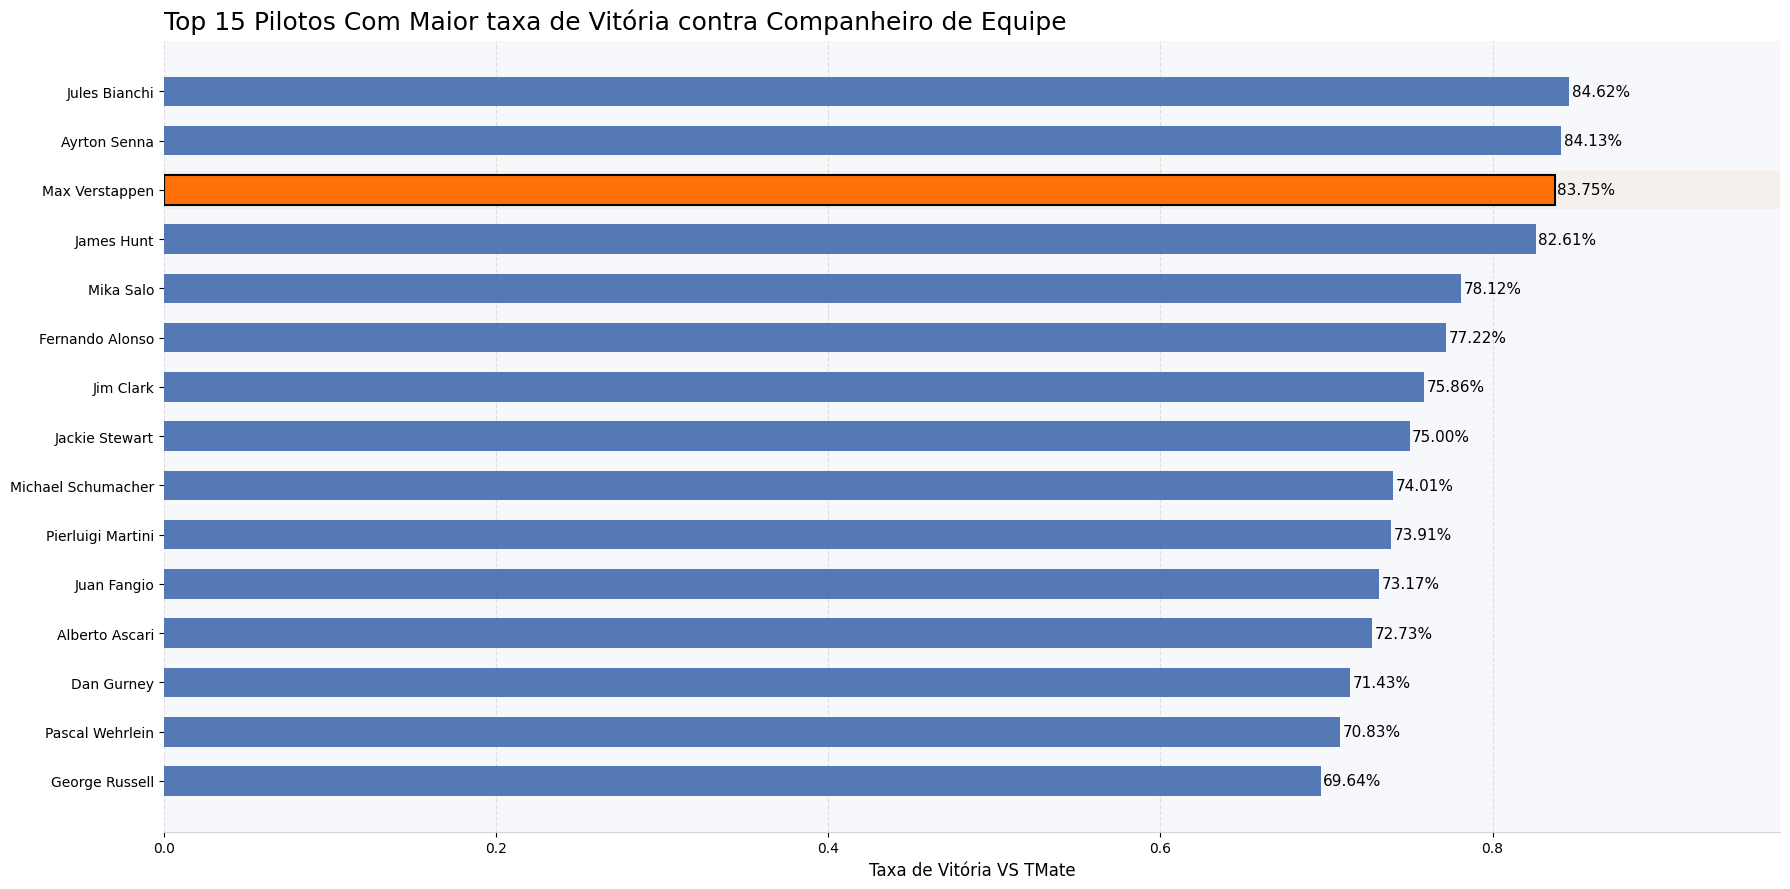

In [56]:
# Agora, partindo pra análise, filtro só o flag de vitória pra ter o percentual de vitória:
df_races_vs_agrup_wins = df_races_vs_agrup[df_races_vs_agrup['fl_win_race_vs_tmate']]

# E vamos dar uma olhada nos top pilotos com maior percentual de vitória contra o companheiro de equipe no dataset inteiro:
fxns.graf_top_pilotos(
    df_races_vs_agrup_wins,
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15 Pilotos Com Maior taxa de Vitória contra Companheiro de Equipe',
    xlabel='Taxa de Vitória VS TMate'
)


Surpresa surpresa, de novo temos o Verstappen aparecendo com um dos maiores percentuais da lista.

É interessante ver outros nomes aparecendo aqui também (Jules Bianchi, já explicado, aparece novamente), temos também o Senna, e alguns outros nomes menos esperados como Mika Salo. Para isso, reforço o filtro que estou utilizando que é de apenas corridas em que ambos os pilotos terminaram, o que muda consideravelmente o resultado da análise se considerarmos DNFs como derrota para alguns dos pilotos.

E, novamente, eu posso usar a lista que eu tinha construído antes, com nomes apenas da F1 mais moderna pra efeitos de comparação:

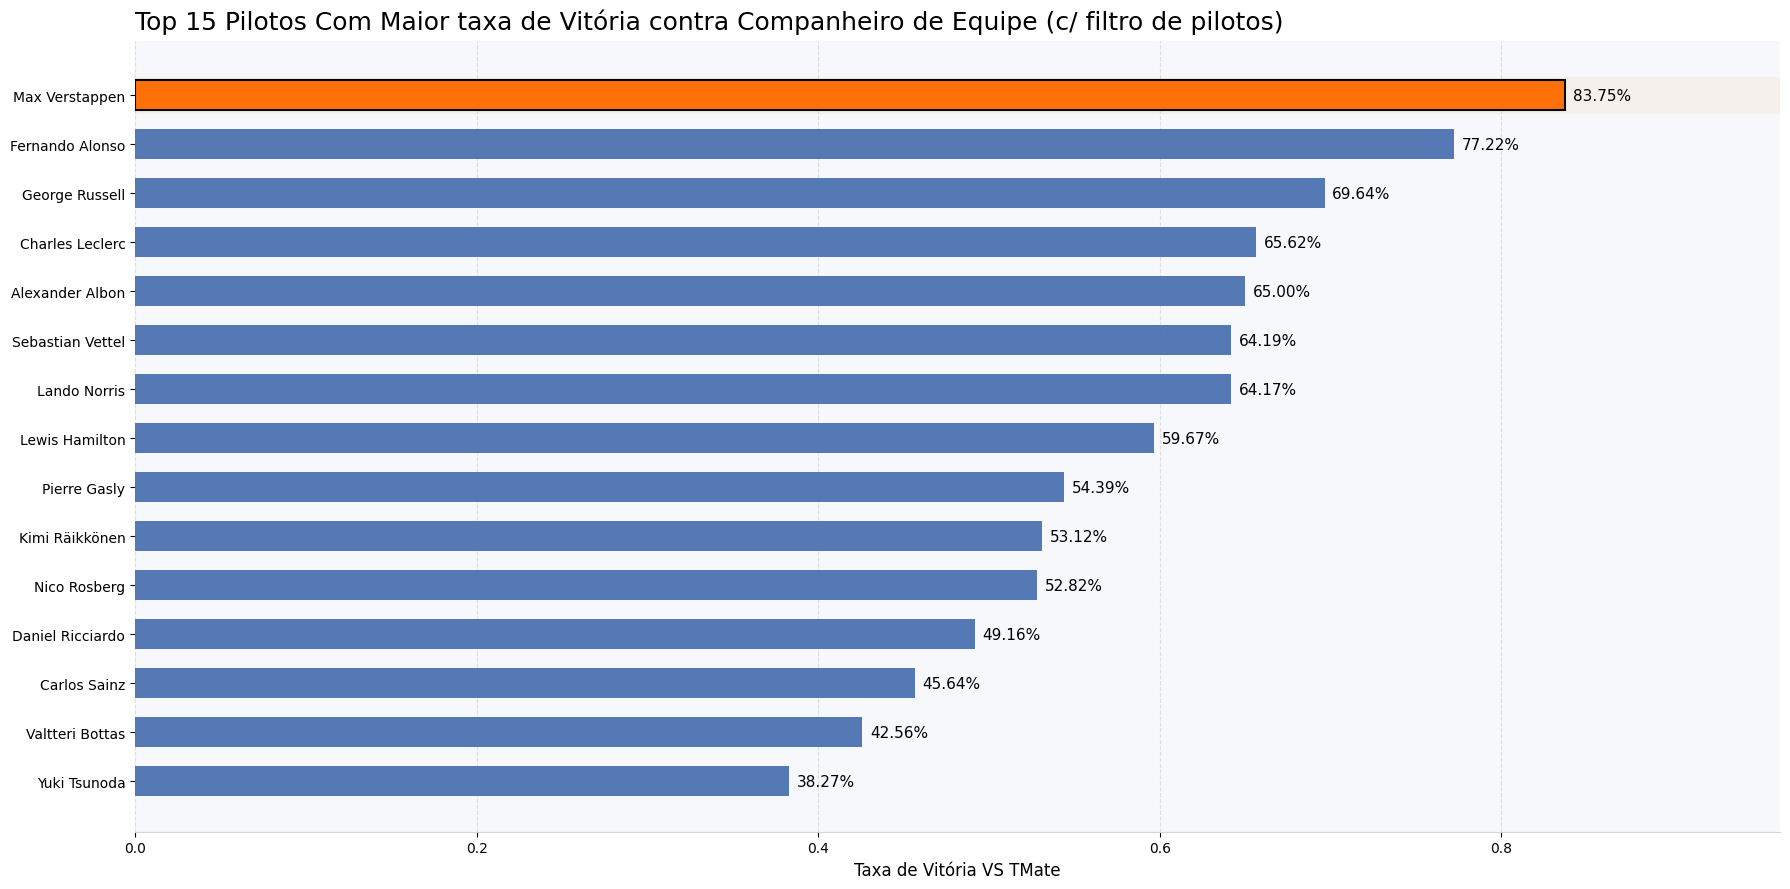

In [57]:
fxns.graf_top_pilotos(
    df_races_vs_agrup_wins[df_races_vs_agrup_wins['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15 Pilotos Com Maior taxa de Vitória contra Companheiro de Equipe (c/ filtro de pilotos)',
    xlabel='Taxa de Vitória VS TMate'
)


Dentre grandes nomes da era moderna da F1, Verstappen aparece com o maior percentual de superação do companheiro de equipe em termos de resultados de corridas.

Novamente, podemos ver Verstappen, por companheiro de equipe:

In [58]:
df_races_vs_agrup_tmate = df_races_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate',
        'fl_win_race_vs_tmate',
    ]
).agg(
    {
        'race_name':'count'
    }
).reset_index().rename(
    columns={
        'race_name':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve com cada companheiro de equipe:
df_races_vs_agrup_tmate['total_rounds_for_driver'] = df_races_vs_agrup_tmate.groupby(['driver_ref', 'driver_full_name_tmate'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_races_vs_agrup_tmate['result_percentage'] = df_races_vs_agrup_tmate['qt_rounds'] / df_races_vs_agrup_tmate['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_races_vs_agrup_tmate = df_races_vs_agrup_tmate[df_races_vs_agrup_tmate['fl_win_race_vs_tmate']]

Text(0.5, 1.0, 'H2H Corridas: Percentual de superação frente ao companheiro de equipe')

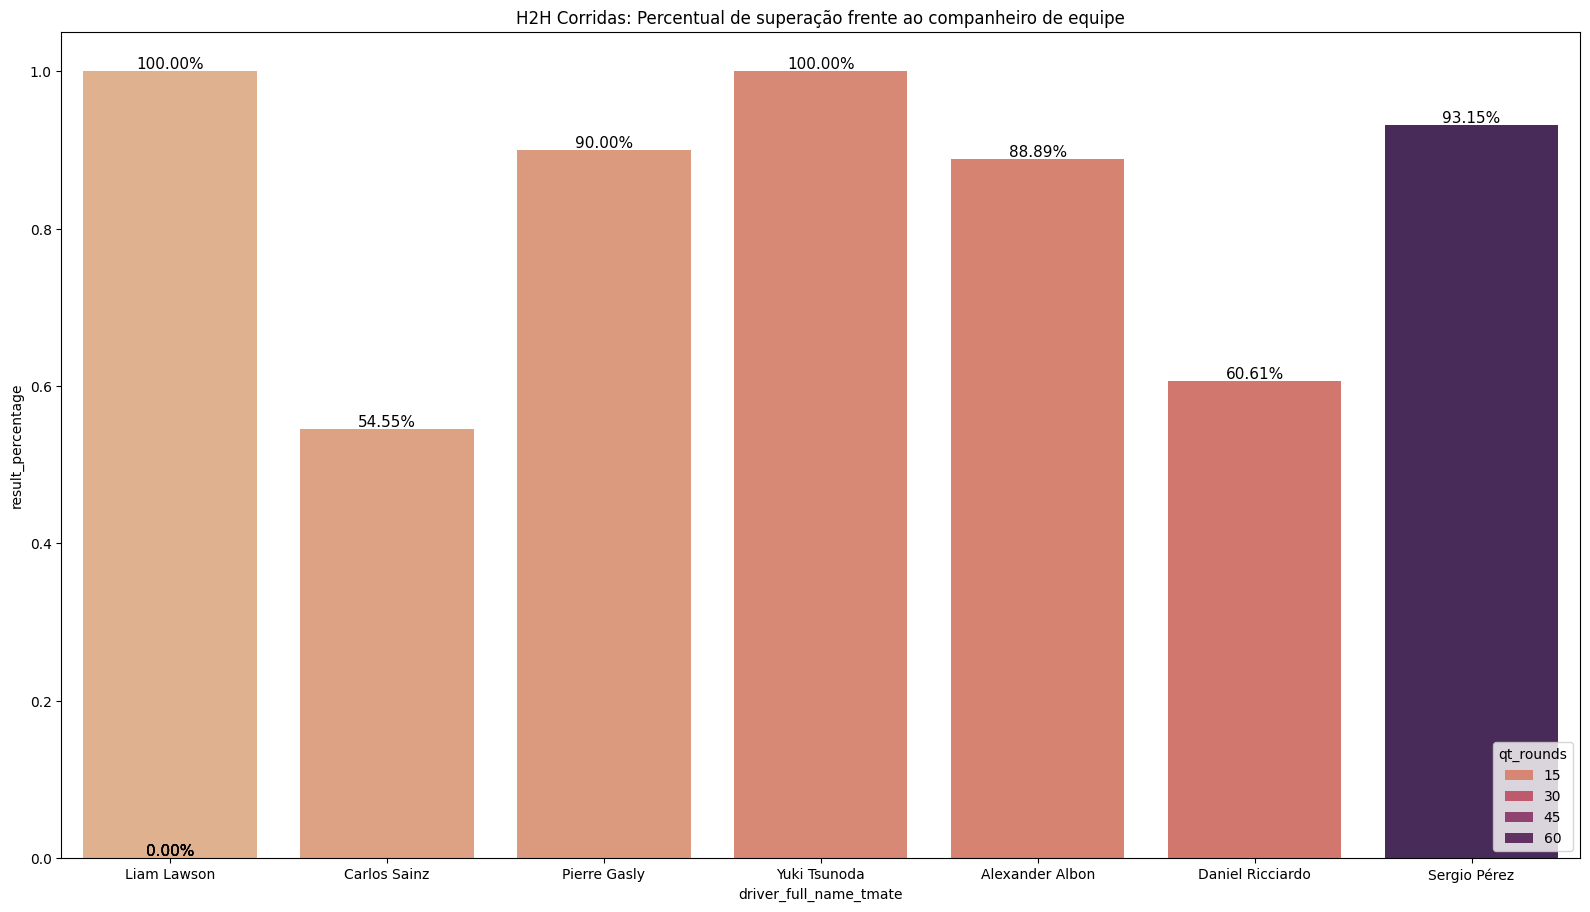

In [59]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_races_vs_agrup_tmate[df_races_vs_agrup_tmate['driver_full_name']=='Max Verstappen'].sort_values('qt_rounds'),
    x='driver_full_name_tmate',
    y='result_percentage',
    hue='qt_rounds',
    palette='flare'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

plt.tight_layout()

ax.set_title('H2H Corridas: Percentual de superação frente ao companheiro de equipe')

Podemos ver que em resultados de corrida, Verstappen superou todos os companheiros de equipe que teve até hoje, sendo que o que chegou mais perto, novamente em linha com o que vimos antes, foi Sainz, na primeira temporada de ambos na F1 na Toro Rosso. Ricciardo também chegou relativamente perto dos 50%, mas contra todo o restante, Verstappen conseguiu ser absolutamente dominante.

### Comparação de volta mais rápida

Bom, até o momento, nesta análise que ficou mais longa do que eu esperava, já analisamos números gerais, analisamos consistência de ritmo de volta, vimos performance de qualificação e diversas óticas de comparação de resultados em campeonato, corrida e quali também. Pra finalizar então, uma outra métrica que me vem na cabeça é verificar os melhores tempos de volta das corridas.

Como já fizemos uma análise de ritmo pela ótica de consistência, seria bom agora termos uma ótica de velocidade mesmo, e a ideia de fazer isso é por meio da volta mais rápida de cada corrida: **Se analisarmos a volta mais rápida de cada piloto por corrida, quem é que costuma ser o mais rápido frente ao companheiro de equipe?**

In [60]:
# Percebi que nas antigas, tem pilotos que possuem seu tempo de volta em branco, então vou tirar esses registros e depois fazer um filtro pra quem só tiver
# uma quantidade mínima razoável de provas registradas para que a análise seja relevante (não faz sentido eu apresentar resultados de um
# piloto que tenha menos do que 20 provas registradas)

df_races_vs_valid = df_races_vs[~df_races_vs['fastest_lap_time_ms'].isna()]

# Trago a quantidade de corridas que o piloto fez:
df_races_vs_valid['count_valid_data_races'] = df_races_vs_valid.groupby(['driver_ref'])['race_name'].transform('count') 

# Filtro pilotos com um mínimo de 20 corridas:
df_races_vs_valid = df_races_vs_valid[df_races_vs_valid['count_valid_data_races']>20]

C:\Users\jvsen\AppData\Local\Temp\ipykernel_39876\2562024306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races_vs_valid['count_valid_data_races'] = df_races_vs_valid.groupby(['driver_ref'])['race_name'].transform('count')


In [61]:
# Agrupo pra calcular a média de ms de quanto cada piloto supera seu companheiro de equipe:

df_vs_fast_lap = df_races_vs_valid.groupby(
    [
        'driver_ref',
        'driver_full_name',   
    ]
).agg(
    {
        'fastest_lap_time_ms_diff_tmate' : 'mean'
    }
).reset_index(
).sort_values(
    ['fastest_lap_time_ms_diff_tmate']
)

# Vou só inverter o valor pra ficar melhor de ver no gráfico:
df_vs_fast_lap['fastest_lap_time_ms_diff_tmate'] = df_vs_fast_lap['fastest_lap_time_ms_diff_tmate']*-1

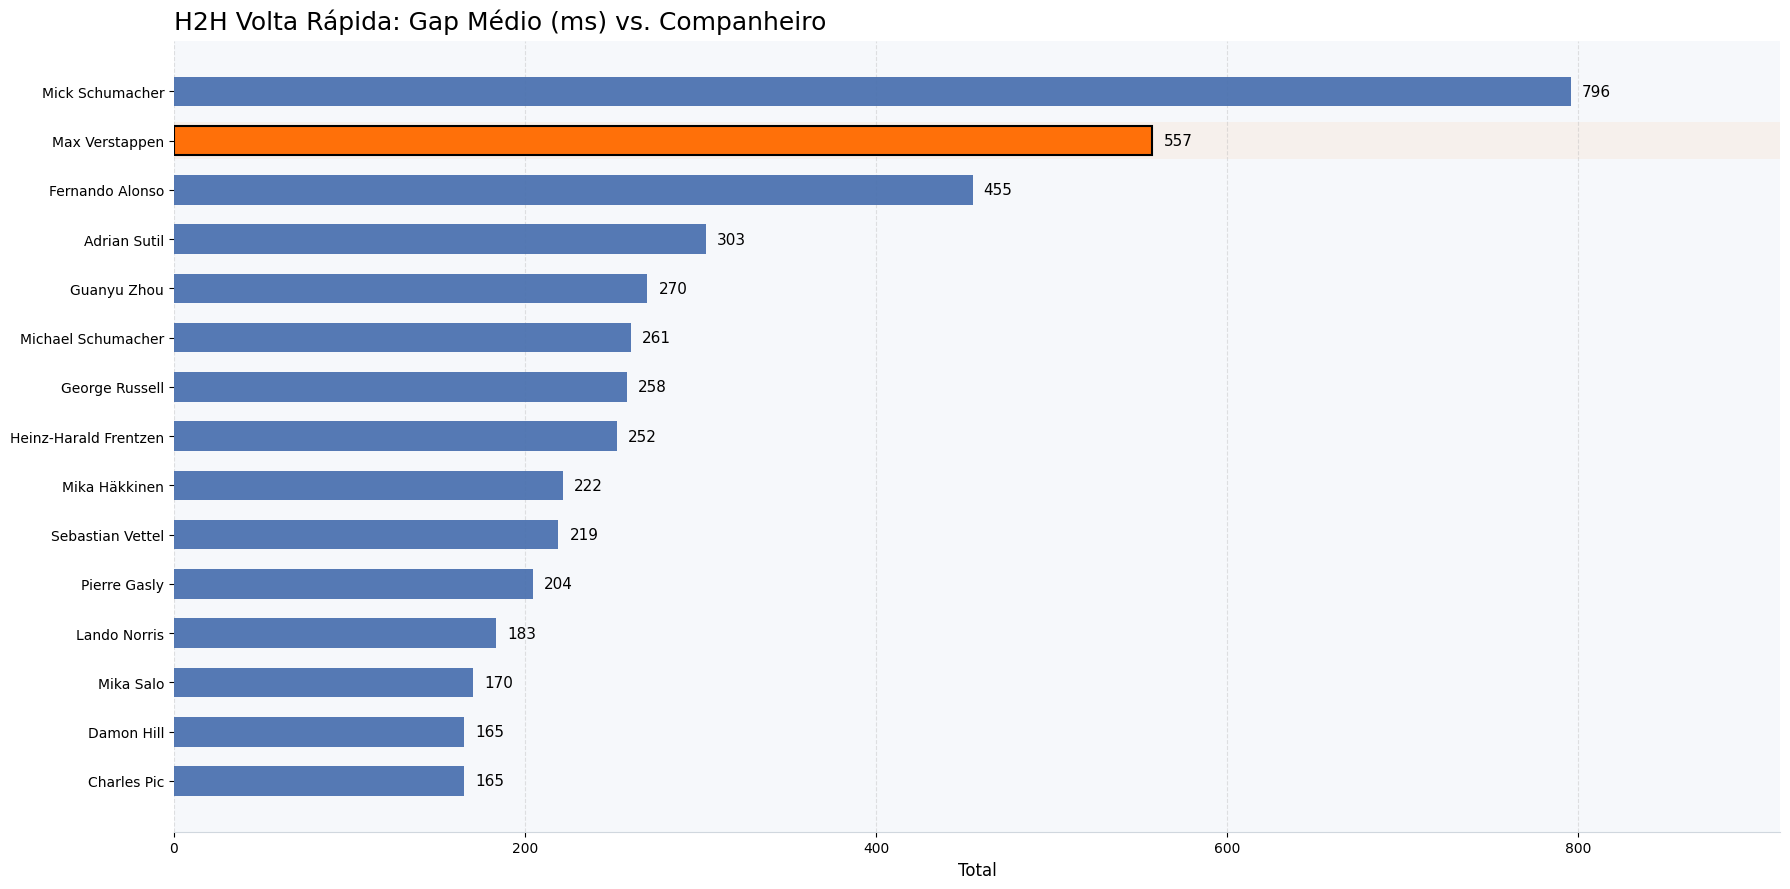

In [62]:
# Vou colocar num gráfico:

fxns.graf_top_pilotos(
    df=df_vs_fast_lap,
    top_n=15,
    col_valor='fastest_lap_time_ms_diff_tmate',
    titulo='H2H Volta Rápida: Gap Médio (ms) vs. Companheiro'
)

Novamente, podemos ver resultados mais ou menos em linha com o que estávamos vendo nas análises anteriores e, para a surpresa de 0 pessoas nessa altura da análise, o Verstappen aparece entre os que mais superaram seu companheiro de equipe em termos de tempo na volta mais rápida.

Aqui, é interessante ter em mente que eu só to vendo o tempo da volta mais rápida, não to analisando ritmo volta a volta que nem fiz antes na análise de consistência.

Vemos nomes como Mick Schumacher (que superou de forma massacrante Nikita Mazepin em sua primeira temporada), Guanyu Zhou, que aparentemente ao analisarmos apenas a volta mais rápida, conseguiu ter uma média de tempo melhor de que seus companheiros de equipe, apesar de ter perdido o H2H de resultados contra Valteri Bottas. E, novamente, apenas pra seguir a linha do que trouxe na análise até agora, vou trazer o mesmo gráfico considerando apenas a lista de pilotos que bolei antes neste notebook:

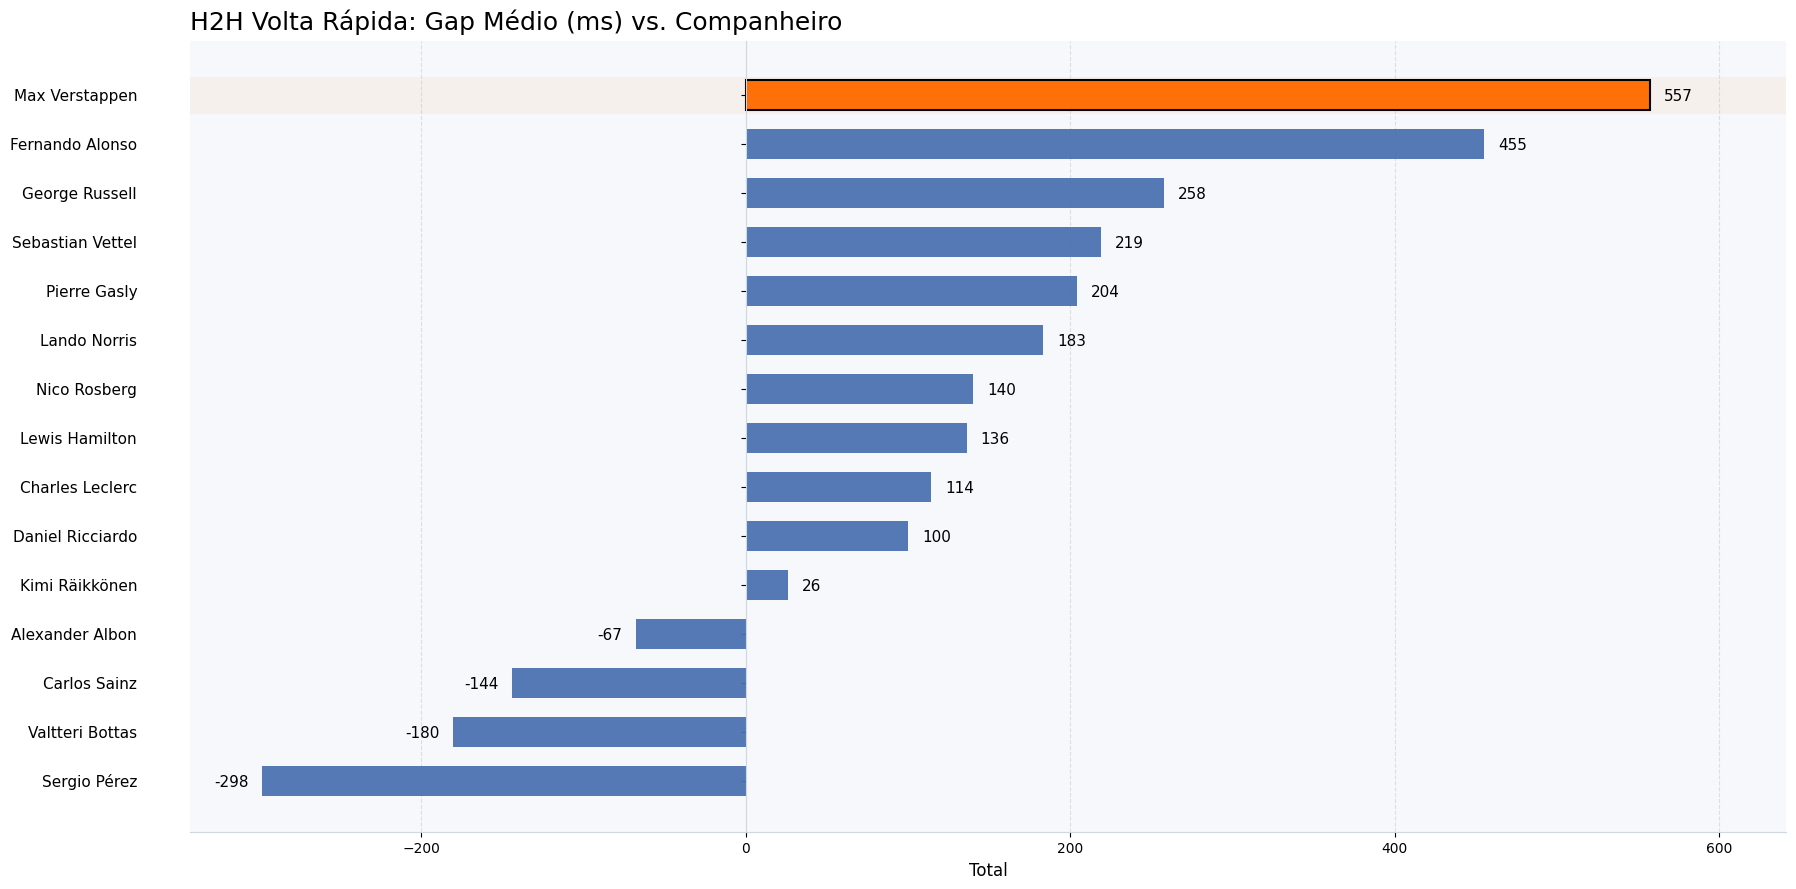

In [63]:
# Vou colocar num gráfico:

fxns.graf_top_pilotos(
    df=df_vs_fast_lap[df_vs_fast_lap['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=15,
    col_valor='fastest_lap_time_ms_diff_tmate',
    titulo='H2H Volta Rápida: Gap Médio (ms) vs. Companheiro'
)

Como já era de se esperar a partir do gráfico anterior, a partir do filtro de pilotos, o Verstappen aparece no topo e, começamos a ver pilotos que possuem uma média negativa, que são justamente pilotos que foram companheiros de equipe dos que tiveram média positiva, o que é interessante e comprova a consistência da análise.

# Conclusão:

Esta análise não se propõe a declarar Max Verstappen o "melhor piloto de todos os tempos", uma comparação complexa entre diferentes eras. O objetivo foi quantificar seu desempenho de forma objetiva, e os dados confirmam: **Verstappen é, sem dúvida, um dos maiores talentos da história do automobilismo.** Ele apareceu no topo de todas as métricas que apresentei nesse notebook, todas visando analisar a "qualidade" de um piloto (em minha visão pessoal).

Os números gerais (Top 3 em vitórias, Top 5 em poles)  já o colocam no eterno hall da fama da F1, mas é mais interessante ainda quando tentamos isaolar a performance do carro. Para isso, a análise focou na consistência de ritmo e na batalha direta contra companheiros de equipe (H2H), e em ambas as frentes, Verstappen se mostrou estatisticamente dominante.

Na métrica de consistência (o desvio padrão relativo), Verstappen provou ser o piloto mais regular do grid moderno, superando nomes como Lewis Hamilton e George Russell (os que chegaram mais perto). Em qualificações, ele vence 79,3% de suas batalhas H2H (a maior taxa entre os rivais da lista) e possui o maior gap médio de velocidade (308ms) sobre seus companheiros. A história se repete nas corridas:  Verstappen venceu seu companheiro em 83,75% das vezes, um número de elite que rivaliza diretamente com o de Ayrton Senna (84,13%).

É válido, no entanto, abrir espaço para o questionamento de que Verstappen não enfrentou o mesmo nível de competição interna que pilotos como Lewis Hamilton. Os dados desta análise validam essa discussão: a única vez que Verstappen não dominou foi contra seu primeiro companheiro, Carlos Sainz. Na Toro Rosso, a batalha de qualificação entre os dois estreantes foi um empate técnico de 11-11 (50,00%). Mais revelador ainda, na média de tempo, Sainz foi 45ms mais rápido que Verstappen nas sessões em que competiram diretamente. Apesar de Verstappen ter batido ele no H2H de corridas, lembrando que era a primeira temporada da F1 pra ambos.

Excetuando essa equilibrada batalha de estreia, os dados mostram um domínio absoluto sobre todos os seus outros companheiros. Verstappen consistentemente "descolou" de seus pares, terminando o campeonato, em média, com 136 pontos e 5.27 vitórias  de vantagem. Em suma, os dados provam que Verstappen combina uma consistência metronômica com uma velocidade pura que o coloca no topo de quase todas as métricas de performance individual.